In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from matplotlib.ticker import FuncFormatter
from scipy.stats import skew, kurtosis
from sklearn.metrics import r2_score
import seaborn as sns

In [399]:


# Define the file path pattern (adjust if needed)
base_path = r"C:\Users\phani\Desktop\Gamma Capture\Data"

# List to store DataFrames
data_frames = []

# Loop through years 2012 to 2021
for year in range(2012, 2022):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Display first few rows to confirm
print(data.head())

                 0        1        2        3        4  5
0  20120102 020000  1.29324  1.29381  1.29324  1.29332  0
1  20120102 020100  1.29326  1.29345  1.29275  1.29341  0
2  20120102 020200  1.29342  1.29344  1.29341  1.29343  0
3  20120102 020300  1.29342  1.29342  1.29335  1.29336  0
4  20120102 020400  1.29324  1.29347  1.29320  1.29346  0


In [400]:
print(data.tail())

                       0        1        2        3        4  5
3712742  20211231 165400  1.13797  1.13797  1.13774  1.13774  0
3712743  20211231 165500  1.13775  1.13781  1.13748  1.13748  0
3712744  20211231 165600  1.13749  1.13765  1.13704  1.13707  0
3712745  20211231 165700  1.13709  1.13740  1.13679  1.13740  0
3712746  20211231 165800  1.13740  1.13740  1.13681  1.13686  0


In [401]:
data.shape

(3712747, 6)

In [402]:
# Rename columns for clarity
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']
print(data.head())

          DateTime     Open     High      Low    Close  Volume
0  20120102 020000  1.29324  1.29381  1.29324  1.29332       0
1  20120102 020100  1.29326  1.29345  1.29275  1.29341       0
2  20120102 020200  1.29342  1.29344  1.29341  1.29343       0
3  20120102 020300  1.29342  1.29342  1.29335  1.29336       0
4  20120102 020400  1.29324  1.29347  1.29320  1.29346       0


In [403]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
print(data.head())

             DateTime     Open     High      Low    Close  Volume
0 2012-01-02 02:00:00  1.29324  1.29381  1.29324  1.29332       0
1 2012-01-02 02:01:00  1.29326  1.29345  1.29275  1.29341       0
2 2012-01-02 02:02:00  1.29342  1.29344  1.29341  1.29343       0
3 2012-01-02 02:03:00  1.29342  1.29342  1.29335  1.29336       0
4 2012-01-02 02:04:00  1.29324  1.29347  1.29320  1.29346       0


In [404]:
#Checking for duplicate timestamps
counts = data['DateTime'].value_counts()
print(counts[counts > 1])

DateTime
2019-10-27 19:00:00    2
2019-10-27 19:01:00    2
2019-10-27 19:02:00    2
2019-10-27 19:03:00    2
2019-10-27 19:04:00    2
                      ..
2021-10-31 19:55:00    2
2021-10-31 19:56:00    2
2021-10-31 19:57:00    2
2021-10-31 19:58:00    2
2021-10-31 19:59:00    2
Name: count, Length: 180, dtype: int64


In [405]:
# 1) Make a boolean mask for every duplicated timestamp (marking all occurrences)
dup_mask = data['DateTime'].duplicated(keep=False)

# 2) Subset and sort so we see each duplicated group in one place
dupe_rows = data.loc[dup_mask].sort_values('DateTime')

print(dupe_rows)

                   DateTime     Open     High      Low    Close  Volume
2904338 2019-10-27 19:00:00  1.10839  1.10844  1.10836  1.10836       0
2904398 2019-10-27 19:00:00  1.10839  1.10844  1.10836  1.10836       0
2904339 2019-10-27 19:01:00  1.10837  1.10837  1.10826  1.10826       0
2904399 2019-10-27 19:01:00  1.10837  1.10837  1.10826  1.10826       0
2904340 2019-10-27 19:02:00  1.10826  1.10826  1.10822  1.10822       0
...                     ...      ...      ...      ...      ...     ...
3648533 2021-10-31 19:57:00  1.15526  1.15526  1.15518  1.15520       0
3648594 2021-10-31 19:58:00  1.15520  1.15545  1.15518  1.15545       0
3648534 2021-10-31 19:58:00  1.15520  1.15545  1.15518  1.15545       0
3648535 2021-10-31 19:59:00  1.15545  1.15555  1.15543  1.15551       0
3648595 2021-10-31 19:59:00  1.15545  1.15555  1.15543  1.15551       0

[360 rows x 6 columns]


In [406]:
# Setting DateTime to index
data.set_index('DateTime', inplace=True)
print(data.head())

                        Open     High      Low    Close  Volume
DateTime                                                       
2012-01-02 02:00:00  1.29324  1.29381  1.29324  1.29332       0
2012-01-02 02:01:00  1.29326  1.29345  1.29275  1.29341       0
2012-01-02 02:02:00  1.29342  1.29344  1.29341  1.29343       0
2012-01-02 02:03:00  1.29342  1.29342  1.29335  1.29336       0
2012-01-02 02:04:00  1.29324  1.29347  1.29320  1.29346       0


In [407]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1min')
full_range

DatetimeIndex(['2012-01-02 02:00:00', '2012-01-02 02:01:00',
               '2012-01-02 02:02:00', '2012-01-02 02:03:00',
               '2012-01-02 02:04:00', '2012-01-02 02:05:00',
               '2012-01-02 02:06:00', '2012-01-02 02:07:00',
               '2012-01-02 02:08:00', '2012-01-02 02:09:00',
               ...
               '2021-12-31 16:49:00', '2021-12-31 16:50:00',
               '2021-12-31 16:51:00', '2021-12-31 16:52:00',
               '2021-12-31 16:53:00', '2021-12-31 16:54:00',
               '2021-12-31 16:55:00', '2021-12-31 16:56:00',
               '2021-12-31 16:57:00', '2021-12-31 16:58:00'],
              dtype='datetime64[ns]', length=5258339, freq='min')

In [408]:
# Find missing timestamps
missing_timestamps = full_range.difference(data.index)   # Identifies missing timestamps

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")

Missing Timestamps:
DatetimeIndex(['2012-01-02 09:24:00', '2012-01-02 10:41:00',
               '2012-01-02 12:29:00', '2012-01-02 12:32:00',
               '2012-01-02 12:34:00', '2012-01-02 12:36:00',
               '2012-01-02 12:45:00', '2012-01-02 13:08:00',
               '2012-01-02 13:15:00', '2012-01-02 13:16:00',
               ...
               '2021-12-30 23:48:00', '2021-12-31 00:25:00',
               '2021-12-31 00:43:00', '2021-12-31 00:48:00',
               '2021-12-31 00:52:00', '2021-12-31 01:58:00',
               '2021-12-31 02:17:00', '2021-12-31 13:43:00',
               '2021-12-31 14:07:00', '2021-12-31 14:36:00'],
              dtype='datetime64[ns]', length=1545772, freq=None)


In [409]:
# All missing timestamps (including weekends)
missing_timestamps.shape   

(1545772,)

In [410]:
# Convert missing timestamps to a DataFrame
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

#marking every row as 1 by creating new column - indicator
missing_df['indicator'] = 1
missing_df

DateTime  indicator
0       2012-01-02 09:24:00          1
1       2012-01-02 10:41:00          1
2       2012-01-02 12:29:00          1
3       2012-01-02 12:32:00          1
4       2012-01-02 12:34:00          1
...                     ...        ...
1545767 2021-12-31 01:58:00          1
1545768 2021-12-31 02:17:00          1
1545769 2021-12-31 13:43:00          1
1545770 2021-12-31 14:07:00          1
1545771 2021-12-31 14:36:00          1

[1545772 rows x 2 columns]

In [411]:
# Generate a complete time range with 1-minute frequency
# Instead of data['DateTime'], use data.index to access the DateTime values
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='min')

In [412]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')
combined_df['indicator'] = pd.NA
combined_df

DateTime     Open     High      Low    Close  Volume  \
0       2012-01-02 02:00:00  1.29324  1.29381  1.29324  1.29332     0.0   
1       2012-01-02 02:01:00  1.29326  1.29345  1.29275  1.29341     0.0   
2       2012-01-02 02:02:00  1.29342  1.29344  1.29341  1.29343     0.0   
3       2012-01-02 02:03:00  1.29342  1.29342  1.29335  1.29336     0.0   
4       2012-01-02 02:04:00  1.29324  1.29347  1.29320  1.29346     0.0   
...                     ...      ...      ...      ...      ...     ...   
5258514 2021-12-31 16:54:00  1.13797  1.13797  1.13774  1.13774     0.0   
5258515 2021-12-31 16:55:00  1.13775  1.13781  1.13748  1.13748     0.0   
5258516 2021-12-31 16:56:00  1.13749  1.13765  1.13704  1.13707     0.0   
5258517 2021-12-31 16:57:00  1.13709  1.13740  1.13679  1.13740     0.0   
5258518 2021-12-31 16:58:00  1.13740  1.13740  1.13681  1.13686     0.0   

        indicator  
0            <NA>  
1            <NA>  
2            <NA>  
3            <NA>  
4            <NA>  
...           ...  
5258514      <NA>  
5258515      <NA>  
5258516      <NA>  
5258517      <NA>  
5258518      <NA>  

[5258519 rows x 7 columns]

In [413]:
# Fill the 'indicator' column: 0 for non-missing, 1 for missing
combined_df['indicator'] = combined_df['Close'].isna().astype(int)

# Sort by DateTime (optional)
combined_df = combined_df.sort_values(by='DateTime').reset_index(drop=True)
combined_df

DateTime     Open     High      Low    Close  Volume  \
0       2012-01-02 02:00:00  1.29324  1.29381  1.29324  1.29332     0.0   
1       2012-01-02 02:01:00  1.29326  1.29345  1.29275  1.29341     0.0   
2       2012-01-02 02:02:00  1.29342  1.29344  1.29341  1.29343     0.0   
3       2012-01-02 02:03:00  1.29342  1.29342  1.29335  1.29336     0.0   
4       2012-01-02 02:04:00  1.29324  1.29347  1.29320  1.29346     0.0   
...                     ...      ...      ...      ...      ...     ...   
5258514 2021-12-31 16:54:00  1.13797  1.13797  1.13774  1.13774     0.0   
5258515 2021-12-31 16:55:00  1.13775  1.13781  1.13748  1.13748     0.0   
5258516 2021-12-31 16:56:00  1.13749  1.13765  1.13704  1.13707     0.0   
5258517 2021-12-31 16:57:00  1.13709  1.13740  1.13679  1.13740     0.0   
5258518 2021-12-31 16:58:00  1.13740  1.13740  1.13681  1.13686     0.0   

         indicator  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
5258514          0  
5258515          0  
5258516          0  
5258517          0  
5258518          0  

[5258519 rows x 7 columns]

In [414]:
# Count 1's in indicator column
count_ones = combined_df['indicator'].sum()
print(f"Number of 1's in indicator column: {count_ones}")


Number of 1's in indicator column: 1545772


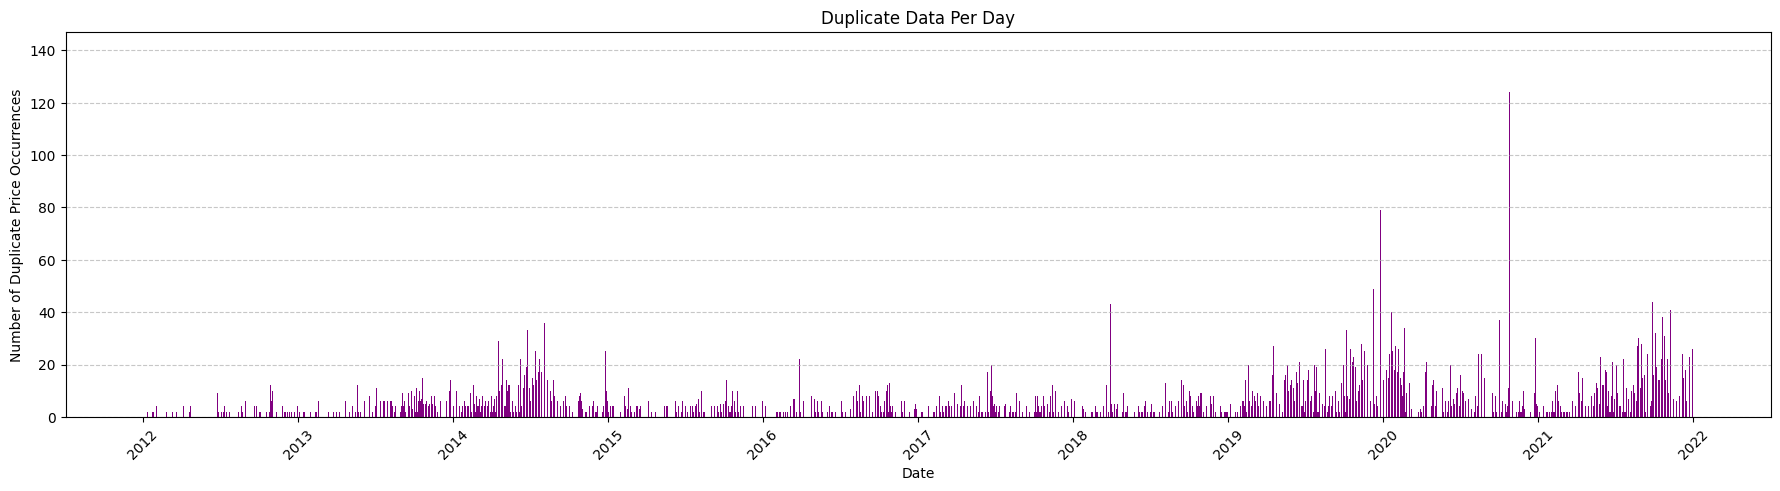

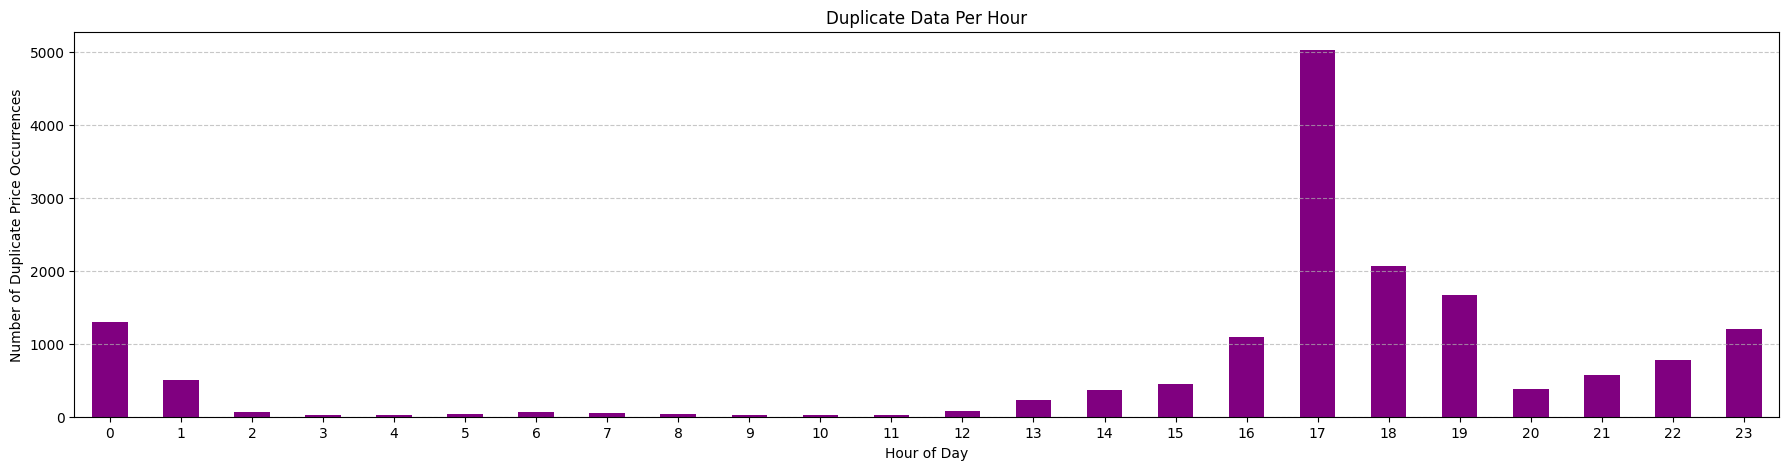

In [415]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# 
plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

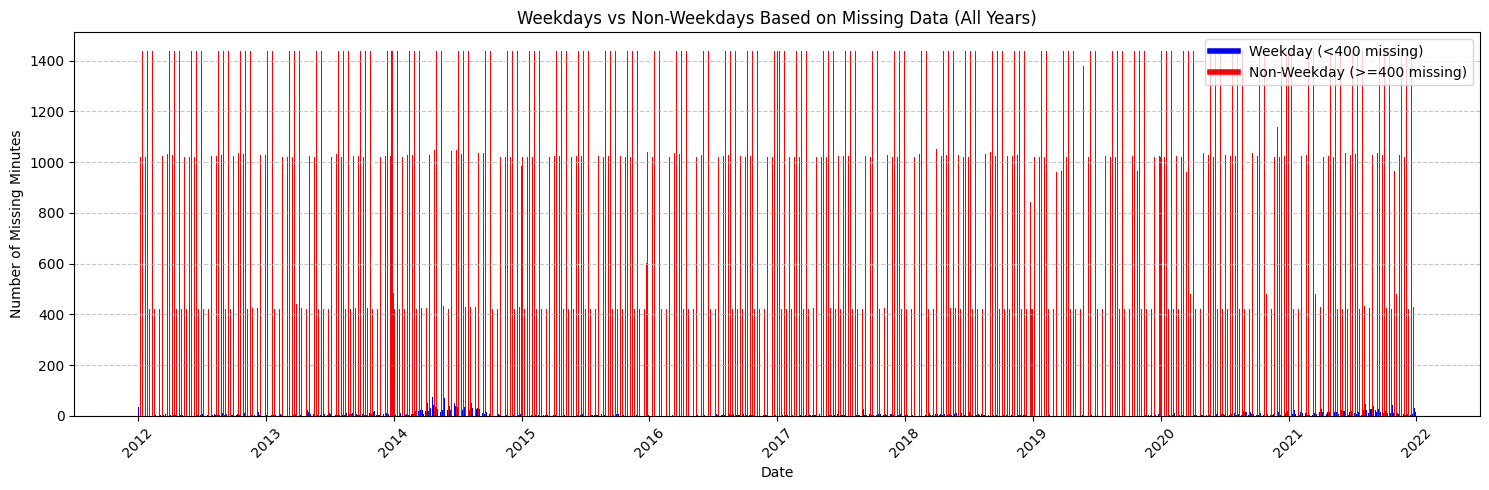

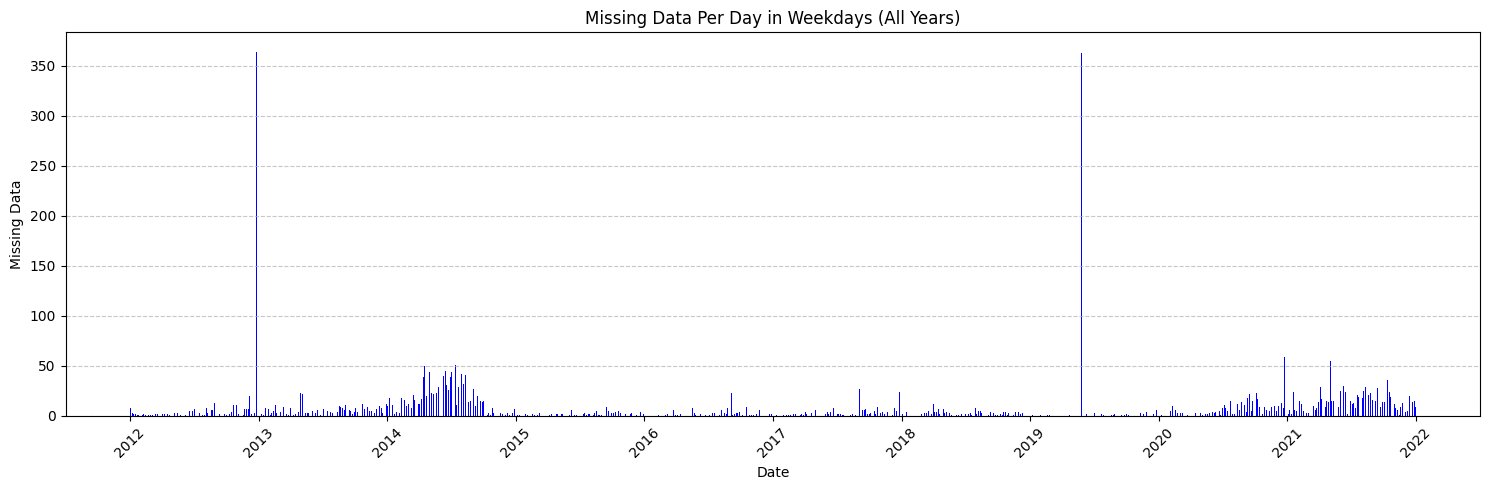

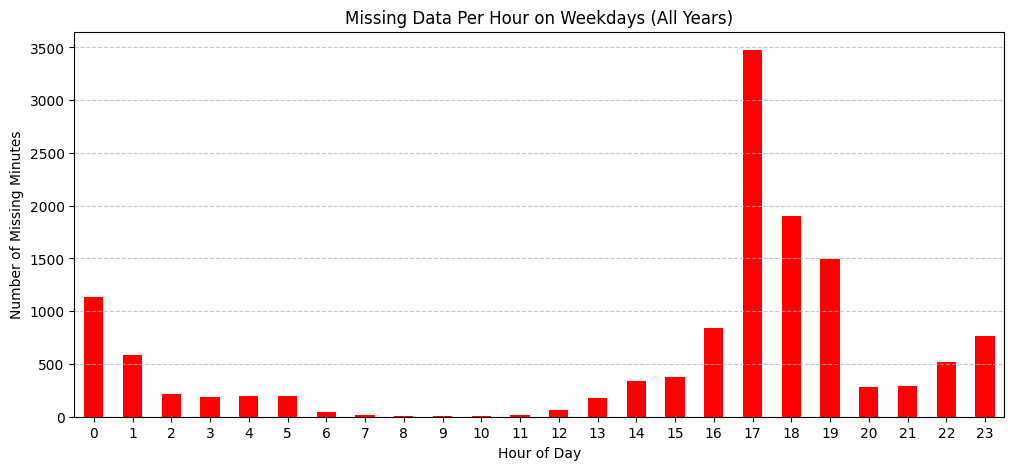

In [416]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index       

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()

# Step 5: Add year-wise grouping for better analysis
missing_per_day_yearly = combined_df.groupby([combined_df['DateTime'].dt.year, combined_df['DateTime'].dt.date])['indicator'].sum()

# --- PLOTS ---

plt.figure(figsize=(15, 5))
colors = ['blue' if date in weekdays else 'red' for date in missing_per_day.index]
plt.bar(missing_per_day.index, missing_per_day.values, color=colors)

plt.title('Weekdays vs Non-Weekdays Based on Missing Data (All Years)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Weekday (<400 missing)')
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Non-Weekday (>=400 missing)')
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()
plt.show()


weekday_missing_data = missing_per_day[weekdays]
plt.figure(figsize=(15, 5))
plt.bar(weekday_missing_data.index, weekday_missing_data.values, color='blue')

plt.title('Missing Data Per Day in Weekdays (All Years)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(12, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [417]:
missing_per_day

DateTime
2012-01-02     34
2012-01-03      8
2012-01-04      0
2012-01-05      1
2012-01-06    421
             ... 
2021-12-27     30
2021-12-28     15
2021-12-29     18
2021-12-30     17
2021-12-31      9
Name: indicator, Length: 3652, dtype: int64

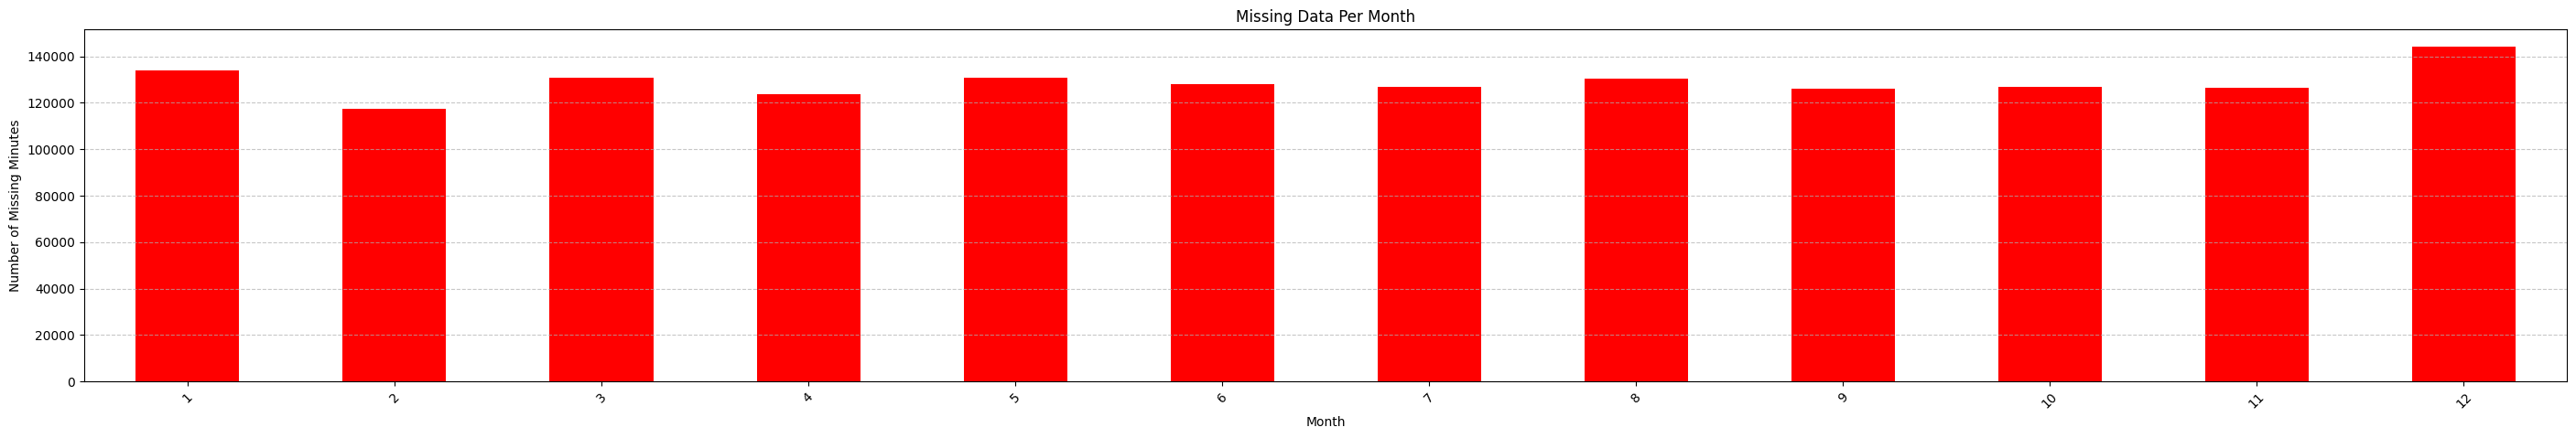

In [418]:
# Group by month and sum the indicator column (missing minutes per month)
missing_per_month = combined_df.groupby(combined_df['DateTime'].dt.month)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(35, 5))
missing_per_month.plot(kind='bar', color='red')
plt.title('Missing Data Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [419]:
print(missing_per_month)

DateTime
1     133889
2     117307
3     130743
4     123789
5     130668
6     128124
7     127025
8     130626
9     126070
10    126858
11    126306
12    144367
Name: indicator, dtype: int64


In [420]:
# We expect to have 4 weekends/ mo. Therefore 4*2*24*60 minutes missing per month = 11,520
sum(missing_per_month)-(11520*12)

1407532

In [421]:
def remove_all_consecutive_duplicates(df):
    """Remove consecutive OHLC duplicates and flat bars with no price movement"""
    df_clean = df.copy()
    
    while True:
        # Check for consecutive duplicates
        prev_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(1)) & 
            (df_clean['High'] == df_clean['High'].shift(1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(1))
        )
        
        next_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(-1)) & 
            (df_clean['High'] == df_clean['High'].shift(-1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(-1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(-1))
        )
        
        # Check for flat bars (no price movement)
        flat_bar = (
            (df_clean['Open'] == df_clean['High']) & 
            (df_clean['Open'] == df_clean['Low']) & 
            (df_clean['Open'] == df_clean['Close'])
        )
        
        # Combine conditions
        is_duplicate = prev_dup | next_dup | flat_bar
        count = is_duplicate.sum()
        
        if count == 0:
            break
            
        print(f"Marking {count} duplicates and flat bars…")

        # 1) blank out the OHLC
        df_clean.loc[is_duplicate, ['Open','High','Low','Close']] = np.nan
        df_clean.loc[is_duplicate, 'Volume'] = 0
        # 2) flag them
        df_clean.loc[is_duplicate, 'indicator'] = 1
        
    
    
    return df_clean

def remove_duplicate_timestamps(df):
    """
    Remove rows so that every DateTime is unique.
    Keeps the first occurrence of each timestamp and deletes all others.
    """
    df_clean = df.copy()

    while True:
        # Mark all rows whose DateTime appears more than once
        dup_mask = df_clean['DateTime'].duplicated(keep=False)
        if not dup_mask.any():
            break

        # Of those duplicates, keep only the first in each group
        to_remove = df_clean['DateTime'].duplicated(keep='first')
        count = to_remove.sum()
        print(f"Removing {count} rows with duplicate timestamps…")

        df_clean = df_clean.loc[~to_remove].reset_index(drop=True)

    return df_clean

def process_duplicated_data(df):
    """
    Process the DataFrame to remove duplicate timestamps and consecutive duplicates.
    """
    # Remove duplicate timestamps
    df = remove_duplicate_timestamps(df)

    # Remove consecutive duplicates and flat bars
    df = remove_all_consecutive_duplicates(df)

    return df



In [422]:
final_data_clean = process_duplicated_data(combined_df)

Removing 180 rows with duplicate timestamps…
Marking 57130 duplicates and flat bars…


In [423]:
def check_dup(data):
    # Check for consecutive duplicates with previous row
    verify_prev = (
        (data['Open'] == data['Open'].shift(1)) & 
        (data['High'] == data['High'].shift(1)) & 
        (data['Low'] == data['Low'].shift(1)) & 
        (data['Close'] == data['Close'].shift(1))
    )
    
    # Check for consecutive duplicates with next row
    verify_next = (
        (data['Open'] == data['Open'].shift(-1)) & 
        (data['High'] == data['High'].shift(-1)) & 
        (data['Low'] == data['Low'].shift(-1)) & 
        (data['Close'] == data['Close'].shift(-1))
    )
    
    # Check for flat bars (no price movement)
    flat_bar = (
        (data['Open'] == data['High']) & 
        (data['Open'] == data['Low']) & 
        (data['Open'] == data['Close'])
    )
    
    # Count each type of duplicate
    consecutive_dups = (verify_prev | verify_next).sum()
    flat_bars = flat_bar.sum()
    total_dups = (verify_prev | verify_next | flat_bar).sum()
    
    print(f"Consecutive duplicates: {consecutive_dups}")
    print(f"Flat bars (no price movement): {flat_bars}")
    print(f"Total issues: {total_dups}")
    
    return total_dups

In [424]:
check_dup(final_data_clean)

Consecutive duplicates: 0
Flat bars (no price movement): 0
Total issues: 0


np.int64(0)

In [425]:
final_data_clean

DateTime     Open     High      Low    Close  Volume  \
0       2012-01-02 02:00:00  1.29324  1.29381  1.29324  1.29332     0.0   
1       2012-01-02 02:01:00  1.29326  1.29345  1.29275  1.29341     0.0   
2       2012-01-02 02:02:00  1.29342  1.29344  1.29341  1.29343     0.0   
3       2012-01-02 02:03:00  1.29342  1.29342  1.29335  1.29336     0.0   
4       2012-01-02 02:04:00  1.29324  1.29347  1.29320  1.29346     0.0   
...                     ...      ...      ...      ...      ...     ...   
5258334 2021-12-31 16:54:00  1.13797  1.13797  1.13774  1.13774     0.0   
5258335 2021-12-31 16:55:00  1.13775  1.13781  1.13748  1.13748     0.0   
5258336 2021-12-31 16:56:00  1.13749  1.13765  1.13704  1.13707     0.0   
5258337 2021-12-31 16:57:00  1.13709  1.13740  1.13679  1.13740     0.0   
5258338 2021-12-31 16:58:00  1.13740  1.13740  1.13681  1.13686     0.0   

         indicator  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
5258334          0  
5258335          0  
5258336          0  
5258337          0  
5258338          0  

[5258339 rows x 7 columns]

In [426]:
data = final_data_clean.copy()
data

DateTime     Open     High      Low    Close  Volume  \
0       2012-01-02 02:00:00  1.29324  1.29381  1.29324  1.29332     0.0   
1       2012-01-02 02:01:00  1.29326  1.29345  1.29275  1.29341     0.0   
2       2012-01-02 02:02:00  1.29342  1.29344  1.29341  1.29343     0.0   
3       2012-01-02 02:03:00  1.29342  1.29342  1.29335  1.29336     0.0   
4       2012-01-02 02:04:00  1.29324  1.29347  1.29320  1.29346     0.0   
...                     ...      ...      ...      ...      ...     ...   
5258334 2021-12-31 16:54:00  1.13797  1.13797  1.13774  1.13774     0.0   
5258335 2021-12-31 16:55:00  1.13775  1.13781  1.13748  1.13748     0.0   
5258336 2021-12-31 16:56:00  1.13749  1.13765  1.13704  1.13707     0.0   
5258337 2021-12-31 16:57:00  1.13709  1.13740  1.13679  1.13740     0.0   
5258338 2021-12-31 16:58:00  1.13740  1.13740  1.13681  1.13686     0.0   

         indicator  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
5258334          0  
5258335          0  
5258336          0  
5258337          0  
5258338          0  

[5258339 rows x 7 columns]

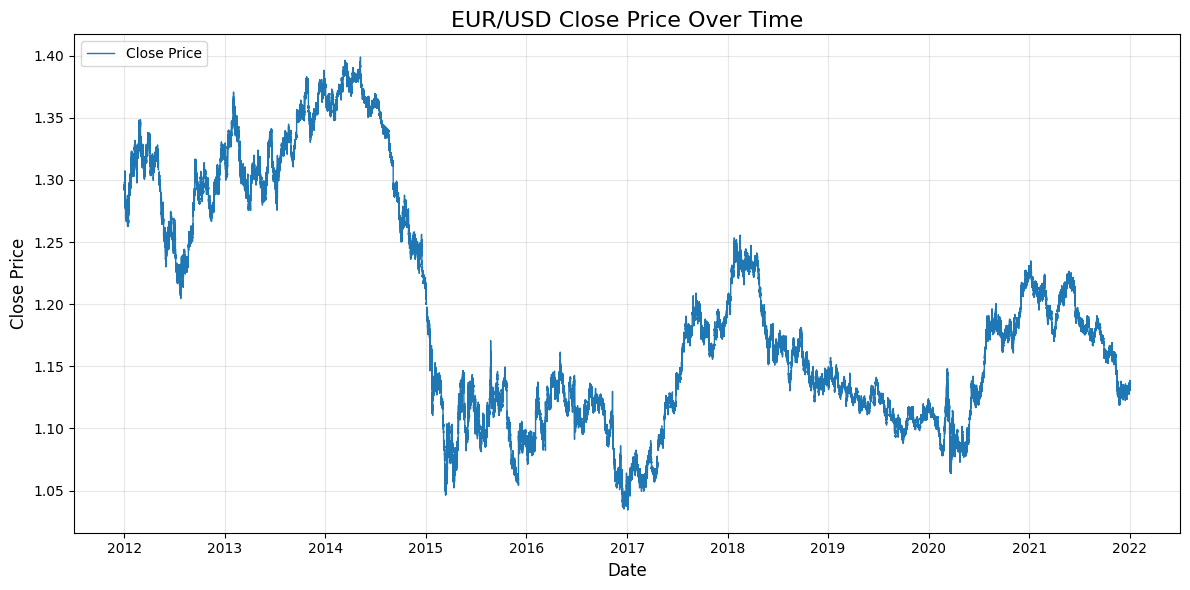

In [427]:
#Plotting graph of data from close price
# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [428]:
# Create a column to identify hourly groups
data['Hour'] = pd.to_datetime(data['DateTime']).dt.floor('h').dt.hour
data

DateTime     Open     High      Low    Close  Volume  \
0       2012-01-02 02:00:00  1.29324  1.29381  1.29324  1.29332     0.0   
1       2012-01-02 02:01:00  1.29326  1.29345  1.29275  1.29341     0.0   
2       2012-01-02 02:02:00  1.29342  1.29344  1.29341  1.29343     0.0   
3       2012-01-02 02:03:00  1.29342  1.29342  1.29335  1.29336     0.0   
4       2012-01-02 02:04:00  1.29324  1.29347  1.29320  1.29346     0.0   
...                     ...      ...      ...      ...      ...     ...   
5258334 2021-12-31 16:54:00  1.13797  1.13797  1.13774  1.13774     0.0   
5258335 2021-12-31 16:55:00  1.13775  1.13781  1.13748  1.13748     0.0   
5258336 2021-12-31 16:56:00  1.13749  1.13765  1.13704  1.13707     0.0   
5258337 2021-12-31 16:57:00  1.13709  1.13740  1.13679  1.13740     0.0   
5258338 2021-12-31 16:58:00  1.13740  1.13740  1.13681  1.13686     0.0   

         indicator  Hour  
0                0     2  
1                0     2  
2                0     2  
3                0     2  
4                0     2  
...            ...   ...  
5258334          0    16  
5258335          0    16  
5258336          0    16  
5258337          0    16  
5258338          0    16  

[5258339 rows x 8 columns]

In [429]:
#Overall, the pipeline is:

#1. Drop days with too many missing minutes.

#2. Resample to your small minute_interval (e.g. 5 min) to form bars.

#3. Compute one per‐bar variance measure 𝑉

#4. Sum V and count bars in each large bucket of length timeframe.

#5. Turn that sum into an annualized realized volatility.

#6. Map it back onto every row, then collapse each bucket to a single row for plotting and statistical analysis.


def preprocess_ohlc_data(data, minute_interval):
    """
    Prepare OHLC data by properly formatting datetime and resampling to specified interval.
    For each timestamp, the interval is (timestamp - minute_interval + 1) to timestamp inclusive.
    For example, for 17:35:00 with 5-minute interval, we include [17:31:00 to 17:35:00].
    """
    # Ensure 'DateTime' is in datetime format
    data.reset_index(inplace=True)
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
    

    data = data.groupby(pd.Grouper(key='DateTime', freq=f'{minute_interval}Min',closed='right',label='right')).agg({
                                          "Open":  "first",
                                          "High":  "max",
                                          "Low":   "min",
                                         "Close": "last",
                                          "Volume": "sum",
                                          "indicator": "sum",
                                          "group_id":  lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan

                                          
                                          })
    return data
data


DateTime     Open     High      Low    Close  Volume  \
0       2012-01-02 02:00:00  1.29324  1.29381  1.29324  1.29332     0.0   
1       2012-01-02 02:01:00  1.29326  1.29345  1.29275  1.29341     0.0   
2       2012-01-02 02:02:00  1.29342  1.29344  1.29341  1.29343     0.0   
3       2012-01-02 02:03:00  1.29342  1.29342  1.29335  1.29336     0.0   
4       2012-01-02 02:04:00  1.29324  1.29347  1.29320  1.29346     0.0   
...                     ...      ...      ...      ...      ...     ...   
5258334 2021-12-31 16:54:00  1.13797  1.13797  1.13774  1.13774     0.0   
5258335 2021-12-31 16:55:00  1.13775  1.13781  1.13748  1.13748     0.0   
5258336 2021-12-31 16:56:00  1.13749  1.13765  1.13704  1.13707     0.0   
5258337 2021-12-31 16:57:00  1.13709  1.13740  1.13679  1.13740     0.0   
5258338 2021-12-31 16:58:00  1.13740  1.13740  1.13681  1.13686     0.0   

         indicator  Hour  
0                0     2  
1                0     2  
2                0     2  
3                0     2  
4                0     2  
...            ...   ...  
5258334          0    16  
5258335          0    16  
5258336          0    16  
5258337          0    16  
5258338          0    16  

[5258339 rows x 8 columns]

In [430]:
def filter_incomplete_groups(ohlc_data, timeframe, threshold, vol_measure, minute_interval):
    """
    Filter out minutes within timeframe groups that exceed missing-data or are undersized.
    Before filtering, plots a scatter of available log-returns per group:
      • Green dots for groups with enough returns (≥ valid_returns_thresh)
      • Red dots for groups with too few returns (< valid_returns_thresh)
    The dashed horizontal line marks valid_returns_thresh.
    """
    # 1) Prepare & index
    ohlc = ohlc_data.copy()
    ohlc['DateTime'] = pd.to_datetime(ohlc['DateTime'], format='%Y%m%d %H%M%S')
    ohlc.set_index('DateTime', inplace=True)
    ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")

    # 2) Compute thresholds
    missing_thresh = timeframe * threshold               # max missing minutes
    valid_returns_thresh = timeframe - missing_thresh    # min log-returns needed

    # 3) Pre-filter metrics
    missing_counts = ohlc.groupby('group_id')['indicator'].sum()
    log_counts     = ohlc.groupby('group_id')['Log_Returns_global'] \
                         .apply(lambda x: x.notna().sum())

    # 4) Scatter plot of log-return counts
    passed = log_counts >= valid_returns_thresh
    plt.figure(figsize=(12, 5))
    plt.scatter(log_counts.index, log_counts.values,
                c=['green' if ok else 'red' for ok in passed],
                edgecolor='k', s=50)
    plt.axhline(y=valid_returns_thresh, color='black',
                linestyle='--', linewidth=2,
                label=f"Return-count threshold = {valid_returns_thresh:.0f}")
    plt.xticks(rotation=45)
    plt.xlabel('Group Start Time')
    plt.ylabel('Available Log-Returns')
    plt.title(
        f"EURO/USD FX Rate rVol ({timeframe} min rVol vs {minute_interval}-min)\n"
        f"Log-Return Counts per {timeframe}-Minute Group (Pre-Filter)\n"
        f"Green  ≥{valid_returns_thresh:.0f} returns, Red  <{valid_returns_thresh:.0f}"
    ) 
    #plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # 5) Now simply select the green groups
    valid_groups = passed[passed].index
    filtered_data = ohlc[ohlc['group_id'].isin(valid_groups)].copy()
    
    # 6) Diagnostics
    print(f"Keeping {len(valid_groups)} groups (the green ones) out of {len(passed)} total.")
    
    return filtered_data


In [431]:
def compute_volatility_measure(ohlc_data, vol_measure):
    """
    Calculate volatility using the specified method.
    
    Parameters:
    - ohlc_data (pd.DataFrame): OHLC data
    - vol_measure (str): Volatility measure ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close')
    
    Returns:
    - ohlc_data (pd.DataFrame): OHLC data with volatility measure added
    """
    # Make a copy to avoid modifying the input
    ohlc_data = ohlc_data.copy()
    
    # Constant for Garman-Klass
    k = 2 * np.log(2) - 1
    
    # Compute volatility measures (Variance)
    if vol_measure == 'Garman-Klass':
        ohlc_data['V'] = 0.5 * (np.log(ohlc_data['High'] / ohlc_data['Low']) ** 2) - \
                       k * (np.log(ohlc_data['Close'] / ohlc_data['Open']) ** 2)
    
    elif vol_measure == 'Rogers-Satchell':
        '''
        # Define prev close
        ohlc_data['Prev_Close'] = ohlc_data['Close'].shift(1)
        # Now compute Rogers–Satchell using Prev_Close (as before)
        ohlc_data['V'] = (
            np.log(ohlc_data['High']  / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['High']  / ohlc_data['Close'])      +
            np.log(ohlc_data['Low']   / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['Low']   / ohlc_data['Close'])
        )'''

        H, L, C = ohlc_data['High'], ohlc_data['Low'], ohlc_data['Close']
        P = ohlc_data['Prev_Close_global']   # <— from step 1
        ohlc_data['V'] = np.log(H/P)*np.log(H/C) + np.log(L/P)*np.log(L/C)
                        
    
    elif vol_measure == 'Close-to-Close':
        ohlc_data['V'] = ohlc_data['Log_Returns_global']**2
        #print(ohlc_data['V'])
    
    else:
        raise ValueError("Invalid volatility measure. Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'.")
    
    return ohlc_data


In [432]:
def setup_rvol_col(data, timeframe, vol_measure):
    """
    The overall purpose is to:
    1. Compute variance contributions for each row
    2. Calculate realized volatility for each group
    3. Attach the group's volatility to every row in that group
    """
    # 1) Compute per-bar variance contributions (V) for each row
    v_by_group = data.groupby('group_id')\
                     .apply(lambda grp: compute_volatility_measure(grp, vol_measure))
    
    # If it came back as a DataFrame, pick its 'V' column
    if isinstance(v_by_group, pd.DataFrame):
        v_series = v_by_group['V']
    else:
        v_series = v_by_group
    
    # Ensure index is consistent
    v_series = v_series.reset_index(level=0, drop=True)
    
    # 2) Attach per-bar V back onto a copy of your DataFrame
    df = data.copy()
    df['V'] = np.nan  # Preallocate
    df.loc[v_series.index, 'V'] = v_series
    
    # 3) Compute per-group sum of V and count of rows
    grp_stats = (
        df
        .groupby('group_id')['V']
        .agg(sum='sum', count='count')
    )
    print(grp_stats)
        # Sample variance WITHOUT using (n_minus_1)
    grp_stats['n_minus_1'] = grp_stats['count']
    grp_stats['var'] = np.where(
        grp_stats['n_minus_1'] > 0,
        grp_stats['sum'],
        np.nan
    )
    

    # 4) √variance → realized vol, annualize as before
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    rvol_per_group = np.sqrt(grp_stats['var'])
    annualized_rvol = rvol_per_group * np.sqrt(365 * 24 * 60/ timeframe)

    # 5) Map both back onto every row
    df[col_name]    = df['group_id'].map(annualized_rvol)*100
    df['n_minus_1'] = df['group_id'].map(grp_stats['n_minus_1'])
    

    return df


In [433]:
def plot_realized_volatility(rvol_df, vol_measure, timeframe, minute_interval):
    """
    Plot realized volatility over time.
    
    Parameters:
    - rvol_df (pd.DataFrame): DataFrame with realized volatility values
    - vol_measure (str): Volatility measure used
    - timeframe (int): Timeframe used for calculation
    """
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    main_title = f"EURO/USD FX Rate rVol ({timeframe} min rVol vs {minute_interval}-min)."
    log_vol = np.log(rvol_df[col_name])
    plt.figure(figsize=(30, 15))
    plt.scatter(rvol_df['EndDateTime'], log_vol, #rvol_df[col_name], 
               label=f'Realized Volatility ({vol_measure}, {timeframe} min)', 
               color='b', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Realized Volatility (%)')
    plt.title(f"{main_title}", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()


In [434]:
def preprocess_by_group_id(rvol, vol_title):
    # Ensure 'DateTime' is in datetime format
    if isinstance(rvol.index, pd.DatetimeIndex):
        rvol.reset_index(inplace=True)
    
    # Convert DateTime if it's not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(rvol['DateTime']):
        rvol['DateTime'] = pd.to_datetime(rvol['DateTime'])
    
    # Group by group_id
    grouped = rvol.groupby('group_id')
    
    
    # Aggregate the data
    aggregated = grouped.agg({
        "DateTime": ["first", "last"],  # Keep first and last datetime for reference
        "Open": "first",                # First price in the group
        "High": "max",                  # Highest price in the group
        "Low": "min",                   # Lowest price in the group
        "Close": "last",                # Last price in the group
        "Volume": "sum",                # Sum of volume
        "indicator": "sum",             # Sum of indicator
        'n_minus_1': "mean",             # Mean of count
    })
    
    # Add vol_title aggregation explicitly
    #aggregated[vol_title] = grouped[vol_title].mean()
    
    #  — Compute mode of vol_title instead of mean:
    mode_series = grouped[vol_title].apply(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
    aggregated[vol_title] = mode_series.values
    
    # Flatten multi-level column names
    aggregated.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in aggregated.columns]
    
    # Rename datetime columns for clarity
    aggregated.rename(columns={
        'DateTime_first': 'StartDateTime',
        'DateTime_last': 'EndDateTime',
        'n_minus_1_mean': 'count'  
    }, inplace=True)

    # Reset index to make group_id a regular column
    aggregated.reset_index(inplace=True)
    #print(aggregated)
    #aggregated['count'] = aggregated['n_minus_1'] # Rename n_minus_1 to count for clarity
    return aggregated


In [435]:
def plot_num_of_rows_per_group(df):
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['group_id'], df['count'], marker='o', linestyle='', markersize=4)
    plt.xlabel('group_id')
    plt.ylabel('count of rows')
    plt.title('count vs. group_id')
    plt.grid(True)
    plt.show()


In [436]:
def plot_rvol_histogram(rvol_data, timeframe, minute_interval, vol_measure, title_dates=None, bins=100):
    """
    Histogram of log(rVol) with:
      • green dashed = arithmetic mean
      • red dotted   = +1σ
      • red dashdot  = -1σ
    Stats‐box on left, legend on right, and date range as subtitle.
    """
    # 1) Series extraction & cleaning
    if isinstance(rvol_data, pd.DataFrame):
        series = rvol_data.iloc[:,0].dropna()
    else:
        series = rvol_data.dropna()
    series = series.replace([np.inf, -np.inf], np.nan).dropna()
    series = series[series > 0]
    if series.empty:
        print("No valid data to plot.")
        return

    # 2) Compute arithmetic stats
    mu_log = np.log(series).mean()
    sigma_log = np.log(series).std()
    sigma = np.exp(sigma_log)
    mu = np.exp(mu_log)

    # 3) Log-transform
    log_data = np.log(series)

    # 4) Plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.hist(log_data, bins=bins, edgecolor='k', alpha=0.7)

    # 5) Vertical lines
    ax.axvline(mu_log, color='green', linestyle='--', label=f"Mean = {mu:.4f}")
    ax.axvline(mu_log + sigma_log, color='red', linestyle=':', label=f"+1σ = {np.exp(mu_log + sigma_log):.4f}")
    ax.axvline(mu_log - sigma_log, color='red', linestyle='-.', label=f"−1σ = {np.exp(mu_log - sigma_log):.4f}")

    # 6) Stats‐box (left side)
    stats_text = (
        f"std: {sigma:.4f}\n"
        f"Min:  {series.min():.4f}\n"
        f"Max:  {series.max():.4f}\n"
        f"Skew: {skew(log_data):.2f}\n"
        f"Kurt: {kurtosis(log_data):.2f}"
    )
    ax.text(0.02, 0.95, stats_text, transform=ax.transAxes,
            fontsize=10, va='top', ha='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

    # 7) Format x‐axis back to original scale
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{np.exp(x):.3f}"))
    
    rvol_actual = series[1:]

    # 8) Title & subtitle
    main_title = f"EURO/USD FX Rate rVol ({timeframe} min rVol vs {minute_interval}-min)."
    third_title = f"Total # of Volatility Observed = {len(rvol_actual)}"
    if title_dates:
        start_str, end_str = title_dates
        subtitle = f"Date range: {start_str} to {end_str}. {third_title}"

    ax.set_title(main_title, fontsize=13, pad=20)
    ax.text(0.5, 1.02, subtitle, transform=ax.transAxes,
            fontsize=11, ha='center')

    ax.set_xlabel("Realized Volatility (%)")
    ax.set_ylabel("# of Vols")

    # 9) Legend outside right
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

    # 10) Tight layout with room on right
    plt.tight_layout(rect=(0,0,0.8,1))
    plt.show()


In [437]:
# Ensure DateTime is in datetime format and is a column

def plot_returns(data):
    time_col = 'DateTime'
    if 'EndDateTime' in data.columns:
        time_col = 'EndDateTime'
    elif 'StartDateTime' in data.columns:
        time_col = 'StartDateTime'
    elif 'DateTime' not in data.columns:
        raise KeyError("No valid time column found for plotting.")

    data['Prev_Close_global']  = data['Close_last'].shift(1)
    data['Prev_Close_global'].fillna(data['Open_first'], inplace=True)
    data['Log_Returns_global'] = np.log(data['Close_last'] / data['Prev_Close_global'])

    # Scatter plot of log returns
    plt.figure(figsize=(15, 6))
    plt.scatter(data[time_col], data['Log_Returns_global'], s=10, alpha=0.6)
    plt.title('EUR/USD Minute-by-Minute Log Returns Over Time')
    plt.xlabel('Time')
    plt.ylabel('Returns (%)')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2%}'.format(x)))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [438]:
def plot_return_histogram(data):
    log_returns = data['Log_Returns_global'].dropna()*100

    # Stats
    mu    = log_returns.mean()
    sigma = log_returns.std()
    r_min = log_returns.min()
    r_max = log_returns.max()
    r_skew = skew(log_returns)
    r_kurt = kurtosis(log_returns)

    stats_text = (
        f"Mean:    {mu:.6f}\n"
        f"Std:     {sigma:.6f}\n"
        f"Min:     {r_min:.6f}\n"
        f"Max:     {r_max:.6f}\n"
        f"Skew:    {r_skew:.6f}\n"
        f"Kurtosis:{r_kurt:.6f}"
    )

    # Plot
    plt.figure(figsize=(12, 6))
    plt.hist(log_returns, bins=60, color='steelblue', edgecolor='black', alpha=0.7)
    plt.axvline(mu, color='green', linestyle='--', linewidth=2, label=f"Mean")
    plt.axvline(mu + sigma, color='red', linestyle='--', linewidth=1.5, label='+1 Std')
    plt.axvline(mu - sigma, color='red', linestyle='--', linewidth=1.5, label='-1 Std')
    plt.title("EUR/USD Minute-by-Minute Log Returns Distribution")
    plt.xlabel("Returns (%)")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.8))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [439]:
def analyze_volatility_prediction(rVol, rVol_pred, time,
                                  timeframe, vol_measure, minute_interval):

    # 1) log-ratio
    log_ratio_full = np.log(rVol / rVol_pred)#np.abs(np.log(rVol / rVol_pred))#np.log(rVol / rVol_pred)
    log_ratio_even = log_ratio_full.iloc[0::2]
    log_ratio_odd  = log_ratio_full.iloc[1::2]
    time_even, time_odd = time[0::2], time[1::2]

    # 2) per-slice stats
    def stats_dict(s):
        return dict(mean=s.mean(), std=s.std(), min=s.min(), max=s.max(),
                    skew=s.skew(), kurtosis=s.kurt())
    stats_even, stats_odd = stats_dict(log_ratio_even), stats_dict(log_ratio_odd)

    # 3) stats-text strings (create **before** plotting!)
    stats_text_even = (
        f"Even Indices:\n"
        f"Mean: {stats_even['mean']:.4f}\n"
        f"Std:  {stats_even['std'] :.4f}\n"
        f"Min:  {stats_even['min'] :.4f}\n"
        f"Max:  {stats_even['max'] :.4f}\n"
        f"Skew: {stats_even['skew']:.2f}\n"
        f"Kurt: {stats_even['kurtosis']:.2f}"
    )
    stats_text_odd = (
        f"Odd  Indices:\n"
        f"Mean: {stats_odd['mean']:.4f}\n"
        f"Std:  {stats_odd['std'] :.4f}\n"
        f"Min:  {stats_odd['min'] :.4f}\n"
        f"Max:  {stats_odd['max'] :.4f}\n"
        f"Skew: {stats_odd['skew']:.2f}\n"
        f"Kurt: {stats_odd['kurtosis']:.2f}"
    )

    # --------------------------------------------------
    # 4) SCATTER (odd vs even, centred at zero line)
    plt.figure(figsize=(12, 6))
    #plt.scatter(time_even, log_ratio_even, color='orange', alpha=0.6, label='Even indices')
    plt.scatter(time_odd , log_ratio_odd , color='blue'  , alpha=0.6, label='Odd indices')
    main = f"EURO/USD FX Rate rVol({timeframe} min rVol vs {minute_interval} min)"
    second_title = f"Predicted = Previous Trailing rVol"
    plt.title(f"{main}\nln(rVol / rVol_pred)\n{second_title}\n Total # of Vol observed = {len(log_ratio_full)}")
    plt.xlabel("Time");   plt.ylabel("Log-ratio error")
    plt.axhline(0, color='red', ls='--', lw=1)
    plt.legend(); plt.grid(alpha=.4, ls='--'); plt.tight_layout()  #legend
    plt.show()
    # --------------------------------------------------
    '''
    # 5) HISTOGRAM with right-hand sidebar
    fig, ax = plt.subplots(figsize=(12, 6))
    #ax.hist(log_ratio_even, bins=50, color='orange', alpha=.4, edgecolor='black', label='Even indices')
    ax.hist(log_ratio_odd , bins=50, color='blue'  , alpha=.6, edgecolor='black', label='Odd indices')

    ax.set_title(f"{main}\nDistribution of ln(rVol / rVol_pred)")
    ax.set_xlabel("Log Ratio"); ax.set_ylabel("Frequency")

    # reserve 22 % of figure for sidebar
    plt.tight_layout(rect=(0, 0, 0.98, 1))

    # legend in sidebar
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 1.5), frameon=False)

    # stats boxes in sidebar
    ax.text(1.02, 0.95, stats_text_odd,  transform=ax.transAxes,
            ha='left', va='top', bbox=dict(fc='white', ec='blue'  , alpha=.8))
    #ax.text(1.02, 0.60, stats_text_even, transform=ax.transAxes,
    #        ha='left', va='top', bbox=dict(fc='white', ec='orange', alpha=.8))

    ax.grid(alpha=.4, ls='--')
    plt.show()'''
    # 5) HISTOGRAM (clean version with only one distribution)
    fig, ax = plt.subplots(figsize=(10, 6))  # reduced width

    # Plot only the log-ratio values (previously called 'odd')
    ax.hist(log_ratio_odd, bins=50, color='steelblue', alpha=0.7, edgecolor='black')

    # Title and labels
    ax.set_title(f"{main}\nDistribution of ln(rVol / rVol_pred)")
    ax.set_xlabel("Log Ratio")
    ax.set_ylabel("Frequency")

    # Optional stats box
    ax.text(0.97, 0.95, stats_text_odd, transform=ax.transAxes,
            ha='right', va='top', fontsize=10,
            bbox=dict(fc='white', ec='black', alpha=0.8))

    # Grid and layout
    ax.grid(alpha=0.4, linestyle='--')
    plt.tight_layout()
    plt.show()

    # --------------------------------------------------

    return {"odd": stats_odd, "even": stats_even}


In [440]:
def plot_rvol_r2(rvol_data, vol_measure, timeframe, minute_interval, vol_title):
    """
    Uses the previous rVol value as the prediction and plots R² between predicted and actual rVol.
    
    Parameters:
    - rvol_series (pd.Series): A time series of realized volatility values.
    - title (str): Title of the plot.
    """
    rvol_data.set_index('EndDateTime', inplace=True)
    
    rvol_series = rvol_data[vol_title]
    # Clean the series: remove inf and NaN
   
    rvol_series = rvol_series.replace([np.inf, -np.inf], np.nan).dropna()
    #rvol_series = rvol_series.set_index('EndDateTime')[f'RVol_{timeframe}min_{vol_measure}']
    
    # Use lag-1 as prediction
    rvol_pred = rvol_series.shift(1).dropna()
    rvol_actual = rvol_series.iloc[1:]
    
    # Align indices
    rvol_pred = rvol_pred.loc[rvol_actual.index]
    
    # Final clean: ensure both have no inf or NaN
    mask = (~rvol_actual.isna()) & (~rvol_pred.isna()) & \
           (~np.isinf(rvol_actual)) & (~np.isinf(rvol_pred))
    rvol_actual = rvol_actual[mask]
    rvol_pred = rvol_pred[mask]
    
    # Check if there is enough data
    if len(rvol_actual) < 2:
        print("Not enough valid data to calculate R².")
        return None
    
    # R² Score
    r2 = r2_score(rvol_actual, rvol_pred)
    # ln R² Score
    ln_R2 = r2_score(np.log(rvol_actual), np.log(rvol_pred))
    
    '''
    # Plot 1: Predicted vs Actual (swapped axes)
    plt.figure(figsize=(8, 6))
    plt.scatter(rvol_pred, rvol_actual, alpha=0.5)  # Swapped axes here
    plt.xlabel('Predicted rVol')                    # Swapped label
    plt.ylabel('Actual rVol')                       # Swapped label
    plt.title(f'{title}\nCorrelation ($R^2$ = {r2:.4f})')
    plt.grid(True)
    plt.show()'''
    
    # Plot 2: Log-Log plot with original rVol labels (swapped axes)
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Calculate log values for plotting
    log_actual = np.log(rvol_actual)
    log_pred = np.log(rvol_pred)
    
    # Scatter plot of log values (swapped axes)
    ax.scatter(log_pred, log_actual, alpha=0.5)  # Swapped axes here
    
    # Set up custom tick locators and formatters to show original values
    from matplotlib.ticker import ScalarFormatter, LogLocator
    
    # Create formatters that will convert log values back to original scale for display
    class ExpFormatter(ScalarFormatter):
        def __call__(self, x, pos=None):
            # Convert log value to original value for display
            return f"{np.exp(x):.3f}"
    
    # Apply the formatters to both axes
    ax.xaxis.set_major_formatter(ExpFormatter())
    ax.yaxis.set_major_formatter(ExpFormatter())
    
    main_title = f"EURO/USD FX Rate rVol ({timeframe} min rVol vs {minute_interval}-min). Actual vs Predicted"
    sub_title = f"Predicted = Previous Trailing rVol"
    third_title = f"Total # of Volatility Observed = {len(rvol_actual)}"
    title = f"{main_title}\n{sub_title}\n{third_title}"
    # Set labels and title (swapped labels)
    ax.set_xlabel('Predicted rVol (%)')                   # Swapped label
    ax.set_ylabel('Actual rVol (%)')                      # Swapped label
    ax.set_title(f'{title}')# = {ln_R2:.4f}')
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    stats = analyze_volatility_prediction(rvol_actual, rvol_pred, time=rvol_actual.index, minute_interval = minute_interval, timeframe = timeframe, vol_measure = vol_measure)
    
    return stats


In [441]:
def calculate_rvol(data, vol_measure, timeframe, minute_interval, threshold, vol_title, plot=True):
    """

    Overall, the pipeline is:
    
    0. Prepare data with necessary columns (we are pushing each close price to the next row and labelling it Prev_Close_global)

    1. Drop timeframe groups with too many missing minutes.

    2. Resample to your small minute_interval (e.g. 5 min) to form bars. (for > 1 min intervals)

    3. Compute one per‐bar variance measure 𝑉

    4. Sum V and count bars in each large bucket of length timeframe.

    5. Turn that sum into an annualized realized volatility.

    6. Map it back onto every row, then collapse each bucket to a single row for plotting and statistical analysis.

    """
    # Input validation
    assert timeframe % 60 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."
    
    ### Step 0: Prepare data with necessary columns (we created a new col (Prev_Close_global) that is the previous period close price)
    ###                                             (we calculate log returns using Prev_Close_global)
    data['Prev_Close_global']  = data['Close'].shift(1)
    
    #### include logic to fill missing prev close with current open if prev close is NaN
    data['Prev_Close_global'].fillna(data['Open'], inplace=True)
    ####
    
    data['Log_Returns_global'] = np.log(data['Close'] / data['Prev_Close_global'])
    
    #print(data)
    
    # Step 1: Filter incomplete timeframe groups
    filtered_ohlc_data = filter_incomplete_groups(data, timeframe, threshold, vol_measure, minute_interval)
    
    # Step 2: Preprocess data
    #grouped_ohlc_data = preprocess_ohlc_data(filtered_ohlc_data, minute_interval)
    grouped_ohlc_data = filtered_ohlc_data.copy()
    # Step 3: Compute volatility measures
    compute_volatility_measure(grouped_ohlc_data, vol_measure)
    # Step 4: Aggregate into realized volatility
    rvol_df1 = setup_rvol_col(grouped_ohlc_data, timeframe, vol_measure)
    # Step 5: Preprocess by group_id
    rvol_df = preprocess_by_group_id(rvol_df1, vol_title = vol_title)

    plot_returns(rvol_df)
    plot_return_histogram(rvol_df)


    #print(rvol_df1)
    
    
    #plot_num_of_rows_per_group(rvol_df)
    
    # Step 6: Plot if requested
    if plot:
        plot_realized_volatility(rvol_df, vol_measure, timeframe, minute_interval)
    print(rvol_df)    
     
    start = rvol_df['StartDateTime'].min()
    end   = rvol_df['EndDateTime'].max()
    start_str, end_str = start.strftime("%m/%d/%Y"), end.strftime("%m/%d/%Y")   
    # Step 7: Plot histogram of realized volatility
    plot_rvol_histogram(rvol_df[vol_title], timeframe, minute_interval, vol_measure, title_dates=(start_str, end_str))
    
    # Step 8: Plot R² between predicted and actual rVol
    plot_rvol_r2(rvol_df, vol_measure, timeframe, minute_interval, vol_title = vol_title)
    
    return rvol_df

C:\Users\phani\AppData\Local\Temp\ipykernel_17456\2865826790.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open'], inplace=True)
C:\Users\phani\AppData\Local\Temp\ipykernel_17456\4174277596.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")


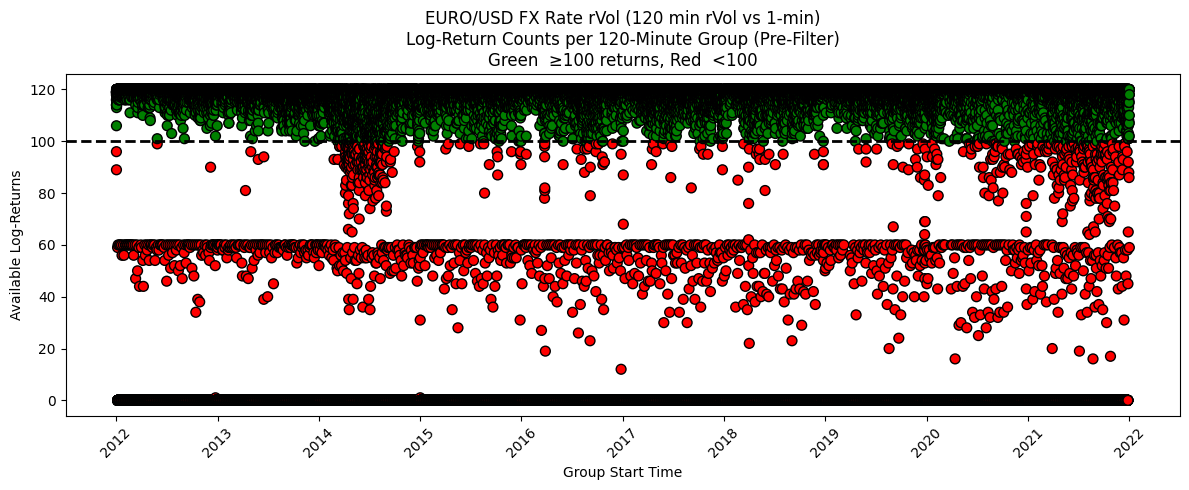

Keeping 29979 groups (the green ones) out of 43820 total.


C:\Users\phani\AppData\Local\Temp\ipykernel_17456\2441554807.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                              sum  count
group_id                                
2012-01-02 02:00:00  2.129705e-06    119
2012-01-02 04:00:00  3.407421e-06    119
2012-01-02 06:00:00  9.679048e-07    118
2012-01-02 08:00:00  1.311797e-06    116
2012-01-02 10:00:00  1.068829e-06    114
...                           ...    ...
2021-12-31 06:00:00  8.690913e-07    120
2021-12-31 08:00:00  2.526838e-06    120
2021-12-31 10:00:00  3.520241e-06    120
2021-12-31 12:00:00  3.048053e-07    118
2021-12-31 14:00:00  1.279594e-07    110

[29979 rows x 2 columns]


c:\Users\phani\Desktop\Gamma Capture\GammaCapture\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\phani\AppData\Local\Temp\ipykernel_17456\779989498.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open_first'], inplace=True)


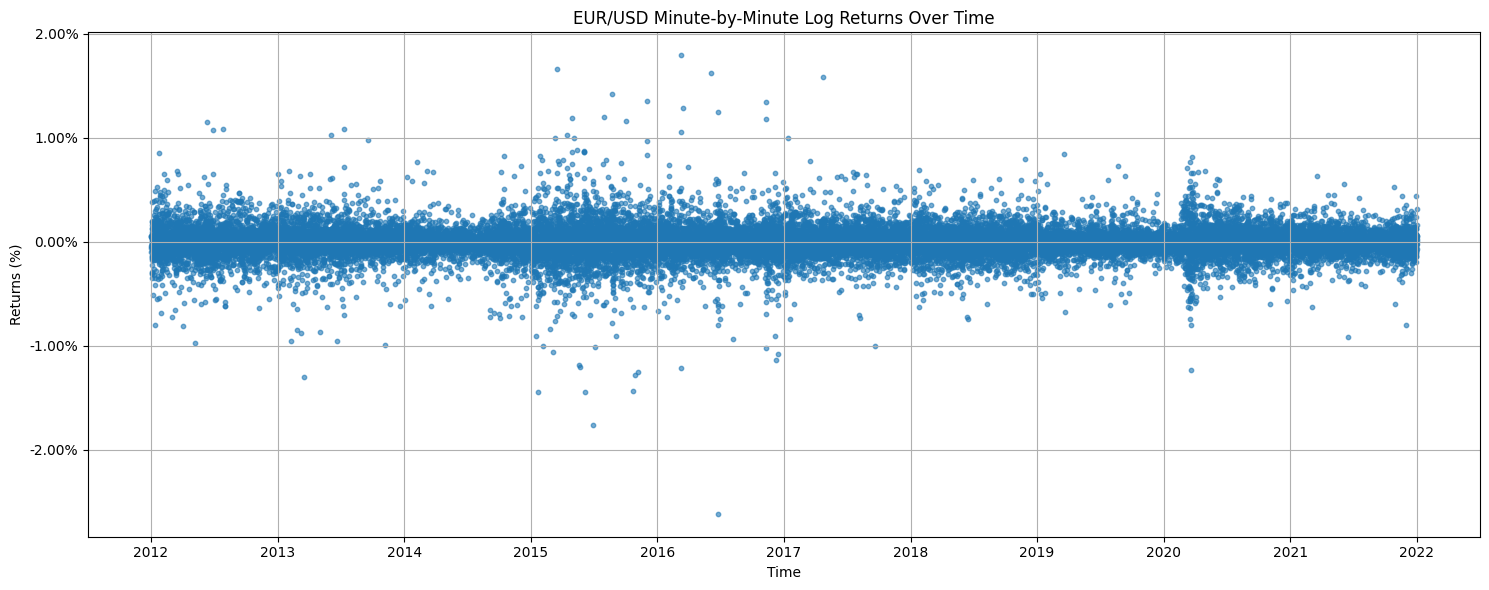

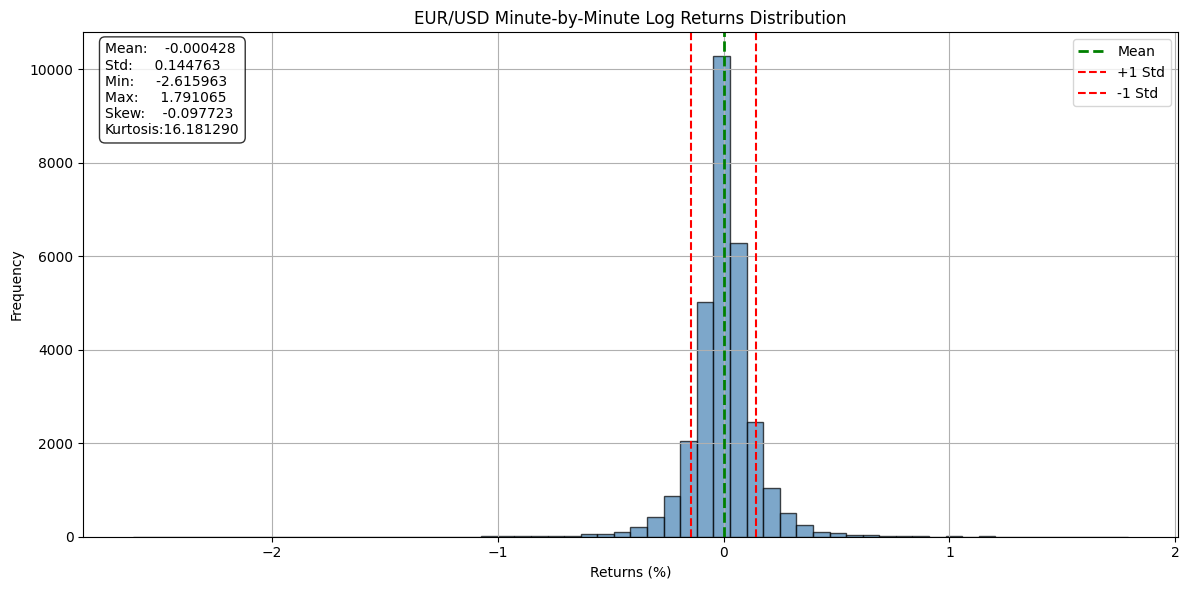

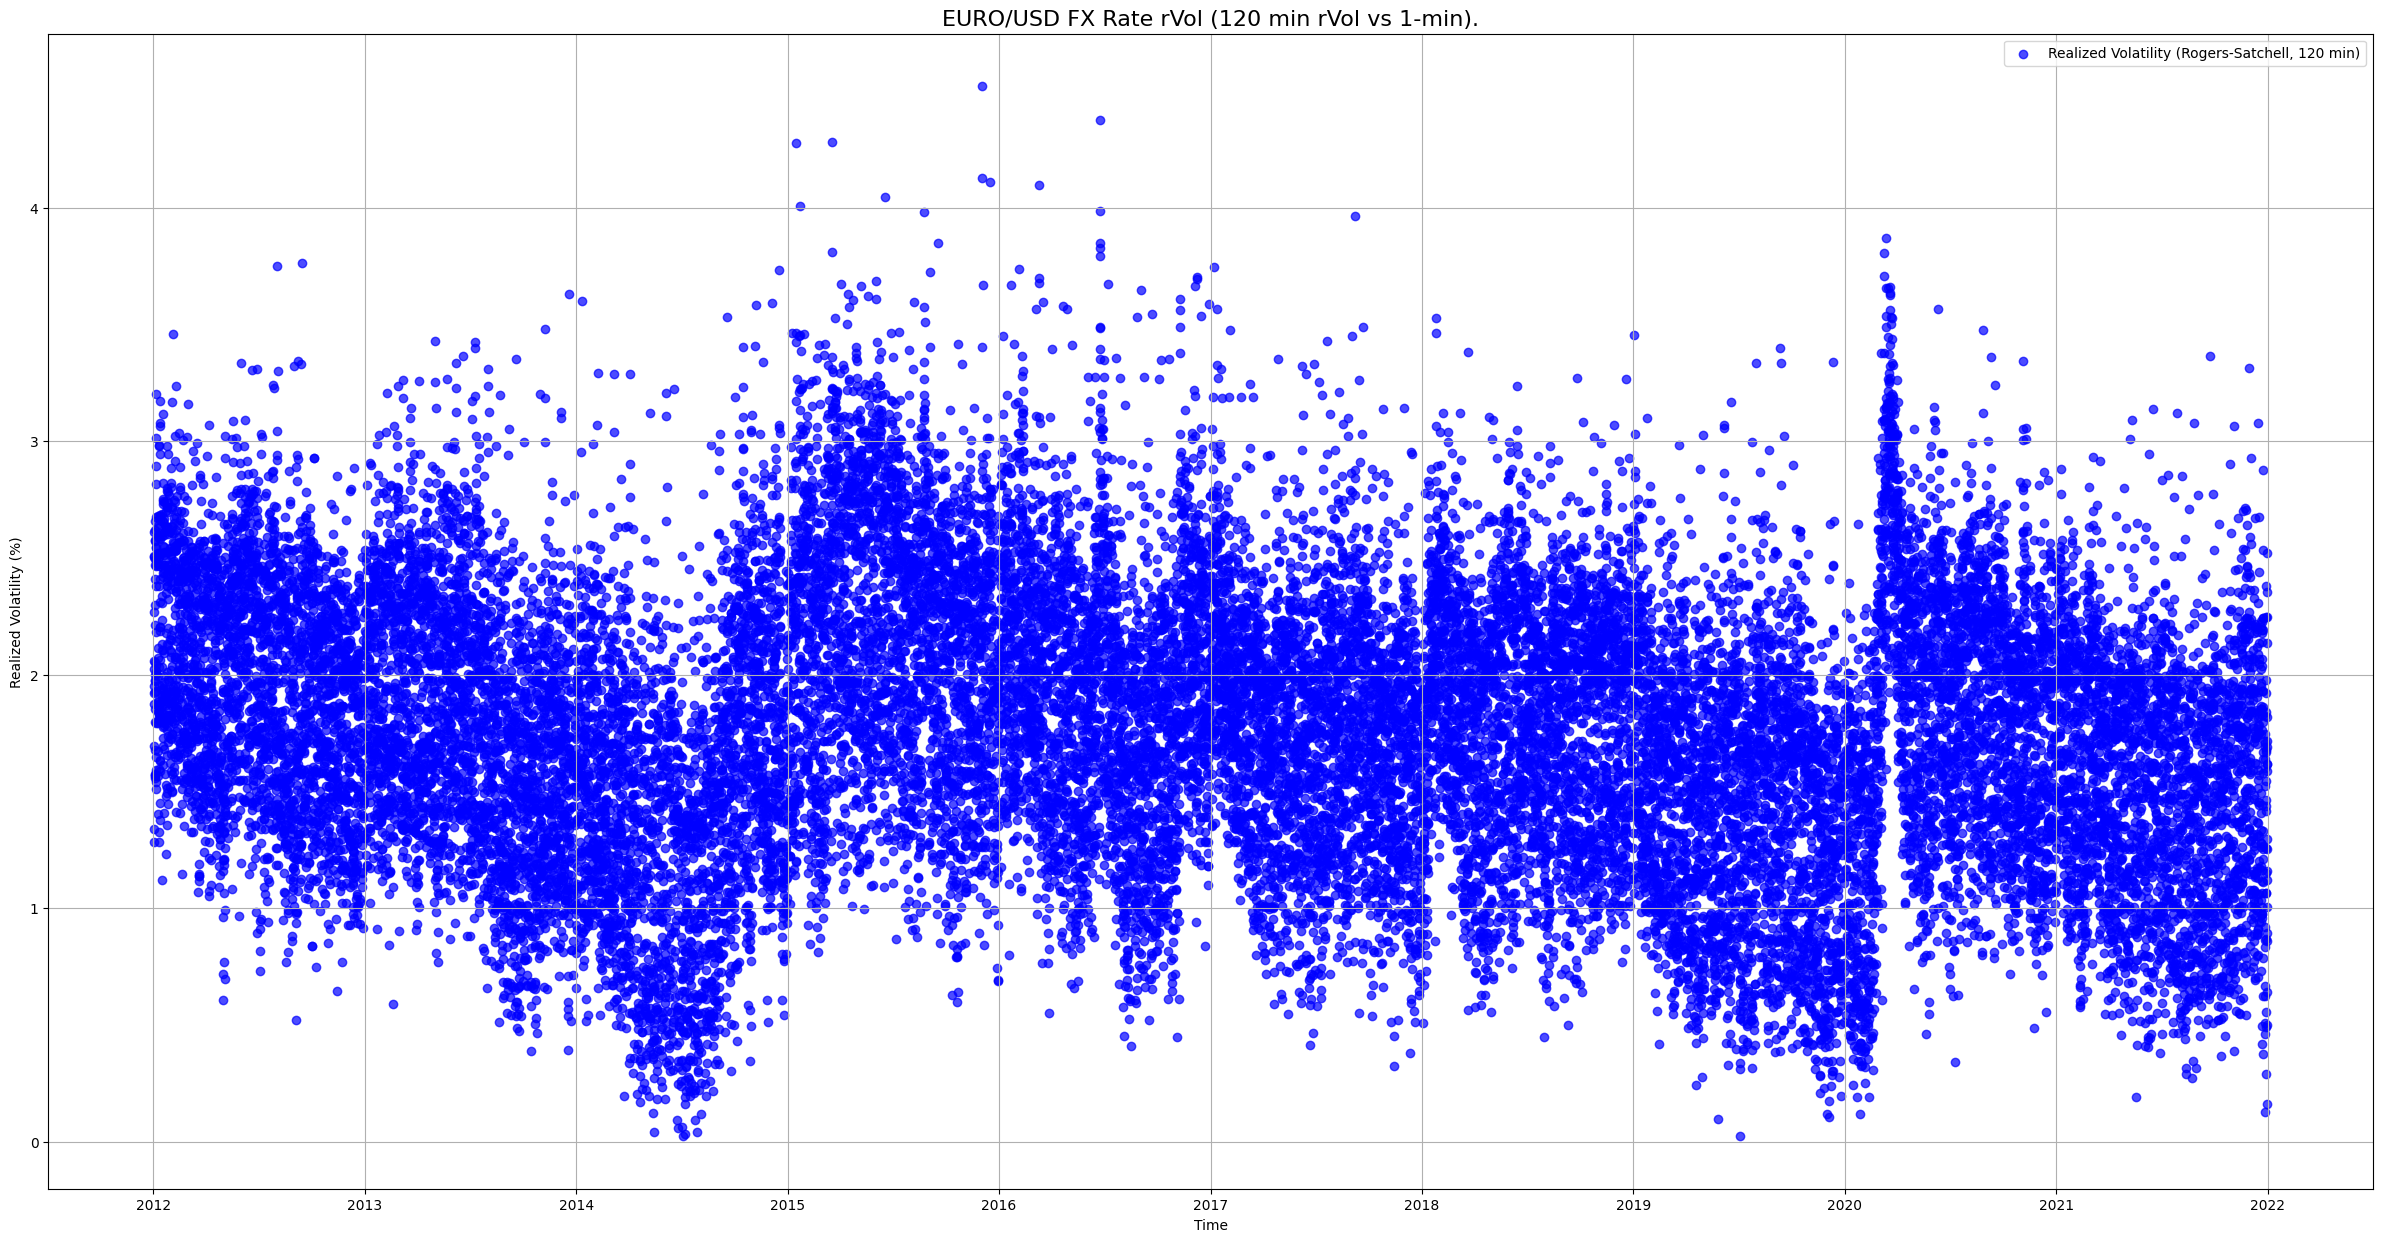

                 group_id       StartDateTime         EndDateTime  Open_first  \
0     2012-01-02 02:00:00 2012-01-02 02:00:00 2012-01-02 03:59:00     1.29324   
1     2012-01-02 04:00:00 2012-01-02 04:00:00 2012-01-02 05:59:00     1.29384   
2     2012-01-02 06:00:00 2012-01-02 06:00:00 2012-01-02 07:59:00     1.29454   
3     2012-01-02 08:00:00 2012-01-02 08:00:00 2012-01-02 09:59:00     1.29382   
4     2012-01-02 10:00:00 2012-01-02 10:00:00 2012-01-02 11:59:00     1.29325   
...                   ...                 ...                 ...         ...   
29974 2021-12-31 06:00:00 2021-12-31 06:00:00 2021-12-31 07:59:00     1.13248   
29975 2021-12-31 08:00:00 2021-12-31 08:00:00 2021-12-31 09:59:00     1.13253   
29976 2021-12-31 10:00:00 2021-12-31 10:00:00 2021-12-31 11:59:00     1.13438   
29977 2021-12-31 12:00:00 2021-12-31 12:00:00 2021-12-31 13:59:00     1.13790   
29978 2021-12-31 14:00:00 2021-12-31 14:00:00 2021-12-31 15:59:00     1.13848   

       High_max  Low_min  C

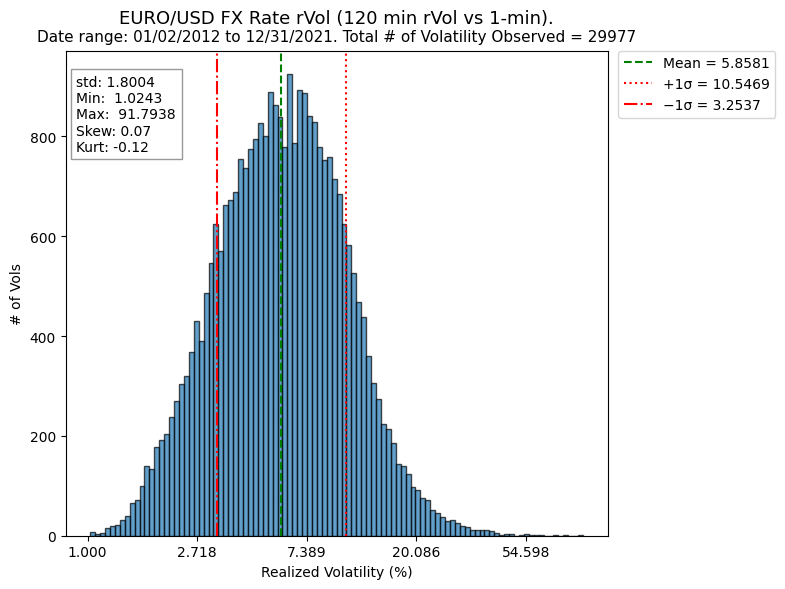

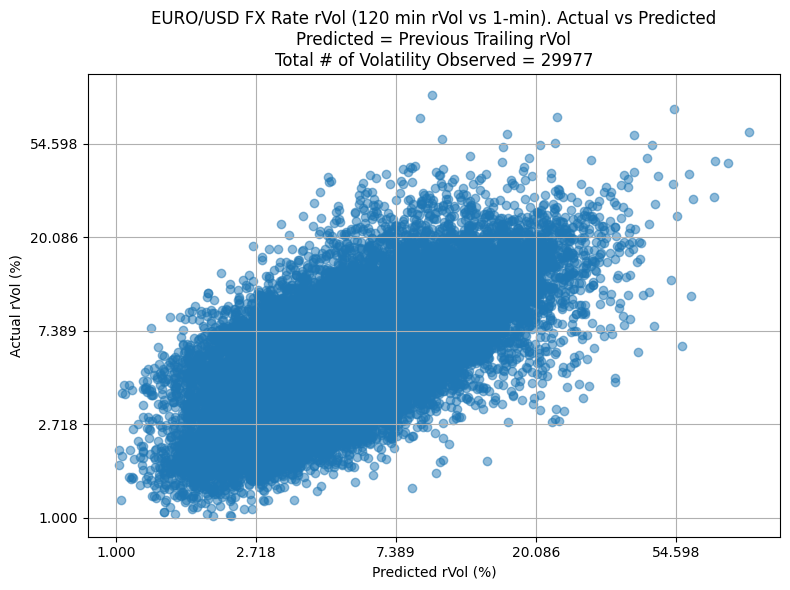

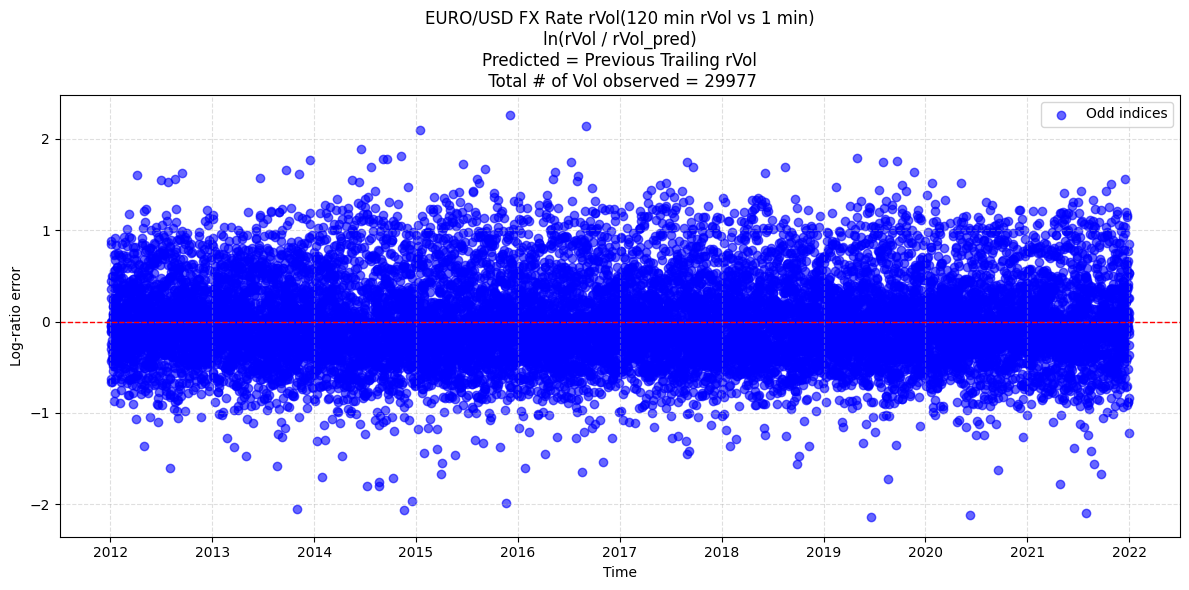

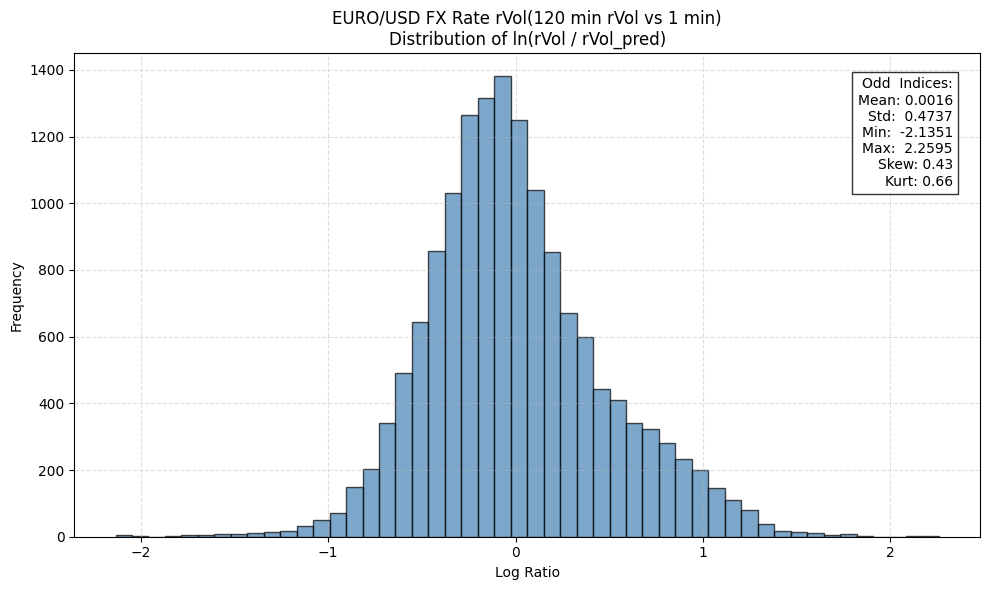

In [442]:
RS_120m_rvol = calculate_rvol(data, 
                              vol_measure = 'Rogers-Satchell', 
                              timeframe = 120, 
                              minute_interval = 1, 
                              threshold = 0.1667, 
                              vol_title = 'RVol_120min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [443]:
RS_120m_rvol.describe()

group_id                  StartDateTime  \
count                          29979                          29979   
mean   2016-12-25 00:03:11.173821440  2016-12-25 00:03:11.173821440   
min              2012-01-02 02:00:00            2012-01-02 02:00:00   
25%              2014-07-03 07:00:00            2014-07-03 07:00:00   
50%              2016-12-29 08:00:00            2016-12-29 08:00:00   
75%              2019-06-18 09:00:00            2019-06-18 09:00:00   
max              2021-12-31 14:00:00            2021-12-31 14:00:00   
std                              NaN                            NaN   

         Open_first      High_max       Low_min    Close_last  Volume_sum  \
count  29979.000000  29979.000000  29979.000000  29979.000000     29979.0   
mean       1.190413      1.191554      1.189299      1.190411         0.0   
min        1.035590      1.037900      1.034060      1.035600         0.0   
25%        1.118010      1.119260      1.116985      1.118025         0.0   
50%        1.169340      1.170440      1.168310      1.169320         0.0   
75%        1.263890      1.265120      1.262575      1.263850         0.0   
max        1.396210      1.399270      1.394770      1.396230         0.0   
std        0.091608      0.091612      0.091598      0.091605         0.0   

       indicator_sum         count  RVol_120min_Rogers-Satchell  \
count   29979.000000  29979.000000                 29978.000000   
mean        1.656193    118.343807                     6.978330   
min         0.000000    100.000000                     1.024268   
25%         0.000000    118.000000                     3.868216   
50%         0.000000    120.000000                     5.885780   
75%         2.000000    120.000000                     8.838733   
max        20.000000    120.000000                    91.793796   
std         3.483439      3.483439                     4.621604   

       Prev_Close_global  Log_Returns_global  
count       29979.000000        29979.000000  
mean            1.190416           -0.000004  
min             1.035600           -0.026160  
25%             1.118025           -0.000596  
50%             1.169330            0.000000  
75%             1.263885            0.000589  
max             1.396230            0.017911  
std             0.091606            0.001448

In [444]:
RS_120m_rvol

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2012-01-02 03:59:00 2012-01-02 02:00:00 2012-01-02 02:00:00     1.29324   
2012-01-02 05:59:00 2012-01-02 04:00:00 2012-01-02 04:00:00     1.29384   
2012-01-02 07:59:00 2012-01-02 06:00:00 2012-01-02 06:00:00     1.29454   
2012-01-02 09:59:00 2012-01-02 08:00:00 2012-01-02 08:00:00     1.29382   
2012-01-02 11:59:00 2012-01-02 10:00:00 2012-01-02 10:00:00     1.29325   
...                                 ...                 ...         ...   
2021-12-31 07:59:00 2021-12-31 06:00:00 2021-12-31 06:00:00     1.13248   
2021-12-31 09:59:00 2021-12-31 08:00:00 2021-12-31 08:00:00     1.13253   
2021-12-31 11:59:00 2021-12-31 10:00:00 2021-12-31 10:00:00     1.13438   
2021-12-31 13:59:00 2021-12-31 12:00:00 2021-12-31 12:00:00     1.13790   
2021-12-31 15:59:00 2021-12-31 14:00:00 2021-12-31 14:00:00     1.13848   

                     High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
EndDateTime                                                                     
2012-01-02 03:59:00   1.29531  1.29275     1.29383         0.0              1   
2012-01-02 05:59:00   1.29709  1.29381     1.29457         0.0              1   
2012-01-02 07:59:00   1.29514  1.29311     1.29381         0.0              2   
2012-01-02 09:59:00   1.29442  1.29227     1.29327         0.0              4   
2012-01-02 11:59:00   1.29413  1.29167     1.29197         0.0              6   
...                       ...      ...         ...         ...            ...   
2021-12-31 07:59:00   1.13349  1.13120     1.13252         0.0              0   
2021-12-31 09:59:00   1.13534  1.13191     1.13437         0.0              0   
2021-12-31 11:59:00   1.13796  1.13379     1.13790         0.0              0   
2021-12-31 13:59:00   1.13863  1.13747     1.13846         0.0              2   
2021-12-31 15:59:00   1.13856  1.13760     1.13760         0.0             10   

                     count  RVol_120min_Rogers-Satchell  Prev_Close_global  \
EndDateTime                                                                  
2012-01-02 03:59:00  119.0                     9.658213            1.29324   
2012-01-02 05:59:00  119.0                    12.216589            1.29383   
2012-01-02 07:59:00  118.0                     6.511085            1.29457   
2012-01-02 09:59:00  116.0                     7.580019            1.29381   
2012-01-02 11:59:00  114.0                     6.842128            1.29327   
...                    ...                          ...                ...   
2021-12-31 07:59:00  120.0                     6.169781            1.13248   
2021-12-31 09:59:00  120.0                    10.520242            1.13252   
2021-12-31 11:59:00  120.0                    12.417189            1.13437   
2021-12-31 13:59:00  118.0                     3.653830            1.13790   
2021-12-31 15:59:00  110.0                     2.367408            1.13846   

                     Log_Returns_global  
EndDateTime                              
2012-01-02 03:59:00            0.000456  
2012-01-02 05:59:00            0.000572  
2012-01-02 07:59:00           -0.000587  
2012-01-02 09:59:00           -0.000417  
2012-01-02 11:59:00           -0.001006  
...                                 ...  
2021-12-31 07:59:00            0.000035  
2021-12-31 09:59:00            0.001632  
2021-12-31 11:59:00            0.003107  
2021-12-31 13:59:00            0.000492  
2021-12-31 15:59:00           -0.000756  

[29979 rows x 12 columns]

In [445]:
RS_120m_rvol.head()

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2012-01-02 03:59:00 2012-01-02 02:00:00 2012-01-02 02:00:00     1.29324   
2012-01-02 05:59:00 2012-01-02 04:00:00 2012-01-02 04:00:00     1.29384   
2012-01-02 07:59:00 2012-01-02 06:00:00 2012-01-02 06:00:00     1.29454   
2012-01-02 09:59:00 2012-01-02 08:00:00 2012-01-02 08:00:00     1.29382   
2012-01-02 11:59:00 2012-01-02 10:00:00 2012-01-02 10:00:00     1.29325   

                     High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
EndDateTime                                                                     
2012-01-02 03:59:00   1.29531  1.29275     1.29383         0.0              1   
2012-01-02 05:59:00   1.29709  1.29381     1.29457         0.0              1   
2012-01-02 07:59:00   1.29514  1.29311     1.29381         0.0              2   
2012-01-02 09:59:00   1.29442  1.29227     1.29327         0.0              4   
2012-01-02 11:59:00   1.29413  1.29167     1.29197         0.0              6   

                     count  RVol_120min_Rogers-Satchell  Prev_Close_global  \
EndDateTime                                                                  
2012-01-02 03:59:00  119.0                     9.658213            1.29324   
2012-01-02 05:59:00  119.0                    12.216589            1.29383   
2012-01-02 07:59:00  118.0                     6.511085            1.29457   
2012-01-02 09:59:00  116.0                     7.580019            1.29381   
2012-01-02 11:59:00  114.0                     6.842128            1.29327   

                     Log_Returns_global  
EndDateTime                              
2012-01-02 03:59:00            0.000456  
2012-01-02 05:59:00            0.000572  
2012-01-02 07:59:00           -0.000587  
2012-01-02 09:59:00           -0.000417  
2012-01-02 11:59:00           -0.001006

In [446]:
def generate_28_day_stability_groups(df, vol_col, stability_days):
    df = df.copy()
    df.sort_index(inplace=True)

    # Step 1: Create rVol_p and log-ratio columns
    df['rVol_p'] = df[vol_col].shift(1)
    df['log_ratio'] = np.log(df[vol_col] / df['rVol_p'])
    df.dropna(inplace=True)
    
    # Splitting into even and odd indices
    even_data = df.iloc[::2]
    odd_data = df.iloc[1::2]
    df = odd_data.copy()

    

    # Step 2: Create Stability Group ID
    start_time = df.index.min().floor('D')
    df['Stability_group_id'] = ((df.index - start_time) // pd.Timedelta(days=stability_days)) * pd.Timedelta(days=stability_days) + start_time

    # Reset index
    df.reset_index(inplace=True)

    # Step 3: Aggregate all required fields
    grouped = df.groupby("Stability_group_id")

    result = grouped.agg(
        StartDateTime=('StartDateTime', 'first'),
        EndDateTime=('EndDateTime', 'last'),
        Open_first=('Open_first', 'first'),
        High_max=('High_max', 'max'),
        Low_min=('Low_min', 'min'),
        Close_last=('Close_last', 'last'),
        Volume_sum=('Volume_sum', 'sum'),
        indicator_sum=('indicator_sum', 'sum'),
        count=('count', 'sum'),
        Vol_mean=(vol_col, 'mean'),
        Vol_std=(vol_col, 'std'),
        Vol_skew=(vol_col, lambda x: skew(x, bias=False) if len(x) > 1 else np.nan),
        Vol_kurtosis=(vol_col, lambda x: kurtosis(x, bias=False) if len(x) > 1 else np.nan),
        #Vol_present=(vol_col, lambda x: x.notna().sum()),
        Log_ratio_Count=('log_ratio', lambda x: x.notna().sum()),
        Log_ratio_Mean= ('log_ratio', 'mean'),#('log_ratio', lambda x: np.mean(np.abs(x))),#('log_ratio', 'mean'), 
        Log_ratio_Std=('log_ratio', 'std'),#('log_ratio', lambda x: np.std(np.abs(x))),#('log_ratio', 'std'),
        Log_ratio_Skew=('log_ratio', lambda x: skew(x, bias=False) if len(x) > 1 else np.nan),
        Log_ratio_Kurtosis=('log_ratio', lambda x: kurtosis(x, bias=False) if len(x) > 1 else np.nan)
    )

    # Step 4: Add group end date
    result['Stability_group_end'] = result.index + pd.Timedelta(days=stability_days) - pd.Timedelta(seconds=1)

    return result


In [447]:
# Generate the 14-day grouped dataset
grouped_28_day_df = generate_28_day_stability_groups(RS_120m_rvol, vol_col='RVol_120min_Rogers-Satchell', stability_days=28)
grouped_28_day_df

StartDateTime         EndDateTime  Open_first  \
Stability_group_id                                                       
2012-01-02         2012-01-02 06:00:00 2012-01-29 23:59:00     1.29454   
2012-01-30         2012-01-30 02:00:00 2012-02-26 23:59:00     1.31470   
2012-02-27         2012-02-27 02:00:00 2012-03-25 23:59:00     1.34419   
2012-03-26         2012-03-26 02:00:00 2012-04-22 23:59:00     1.32567   
2012-04-23         2012-04-23 02:00:00 2012-05-20 23:59:00     1.31893   
...                                ...                 ...         ...   
2021-08-30         2021-08-30 00:00:00 2021-09-26 23:59:00     1.18038   
2021-09-27         2021-09-27 02:00:00 2021-10-24 23:59:00     1.17204   
2021-10-25         2021-10-25 02:00:00 2021-11-21 23:59:00     1.16569   
2021-11-22         2021-11-22 02:00:00 2021-12-19 23:59:00     1.12664   
2021-12-20         2021-12-20 02:00:00 2021-12-31 15:59:00     1.12519   

                    High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
Stability_group_id                                                             
2012-01-02           1.32207  1.26363     1.31766         0.0             63   
2012-01-30           1.34856  1.29736     1.34490         0.0             44   
2012-02-27           1.34848  1.30127     1.32648         0.0             52   
2012-03-26           1.33796  1.30025     1.31914         0.0             62   
2012-04-23           1.32829  1.26545     1.27940         0.0             63   
...                      ...      ...         ...         ...            ...   
2021-08-30           1.19090  1.16834     1.17221         0.0            250   
2021-09-27           1.17228  1.15242     1.16638         0.0            193   
2021-10-25           1.16899  1.12499     1.12780         0.0            213   
2021-11-22           1.13827  1.11859     1.12492         0.0            202   
2021-12-20           1.13856  1.12471     1.13760         0.0            260   

                      count  Vol_mean   Vol_std  Vol_skew  Vol_kurtosis  \
Stability_group_id                                                        
2012-01-02          13857.0  9.685762  4.518176  0.719478     -0.167932   
2012-01-30          14116.0  9.568767  4.010291  0.967011      1.266636   
2012-02-27          14108.0  8.255587  3.775521  1.165130      1.772994   
2012-03-26          14098.0  7.968764  3.293604  0.884005      1.173972   
2012-04-23          14097.0  7.929951  3.574069  0.803032      0.580965   
...                     ...       ...       ...       ...           ...   
2021-08-30          12350.0  4.405455  3.278227  4.618214     30.993077   
2021-09-27          12287.0  4.642152  2.407876  1.545987      4.417007   
2021-10-25          13227.0  5.388936  3.343728  2.018100      5.939758   
2021-11-22          13478.0  5.816001  3.652039  2.336033     10.099833   
2021-12-20           6340.0  4.889726  2.936707  0.818501      0.036345   

                    Log_ratio_Count  Log_ratio_Mean  Log_ratio_Std  \
Stability_group_id                                                   
2012-01-02                      116       -0.004706       0.379195   
2012-01-30                      118       -0.011703       0.367407   
2012-02-27                      118        0.006848       0.430742   
2012-03-26                      118        0.024006       0.395598   
2012-04-23                      118        0.050341       0.461963   
...                             ...             ...            ...   
2021-08-30                      105       -0.025123       0.525707   
2021-09-27                      104        0.037030       0.507749   
2021-10-25                      112        0.028708       0.453642   
2021-11-22                      114       -0.052558       0.471107   
2021-12-20                       55       -0.085585       0.626950   

                    Log_ratio_Skew  Log_ratio_Kurtosis Stability_group_end  
Stability_group_id                                       

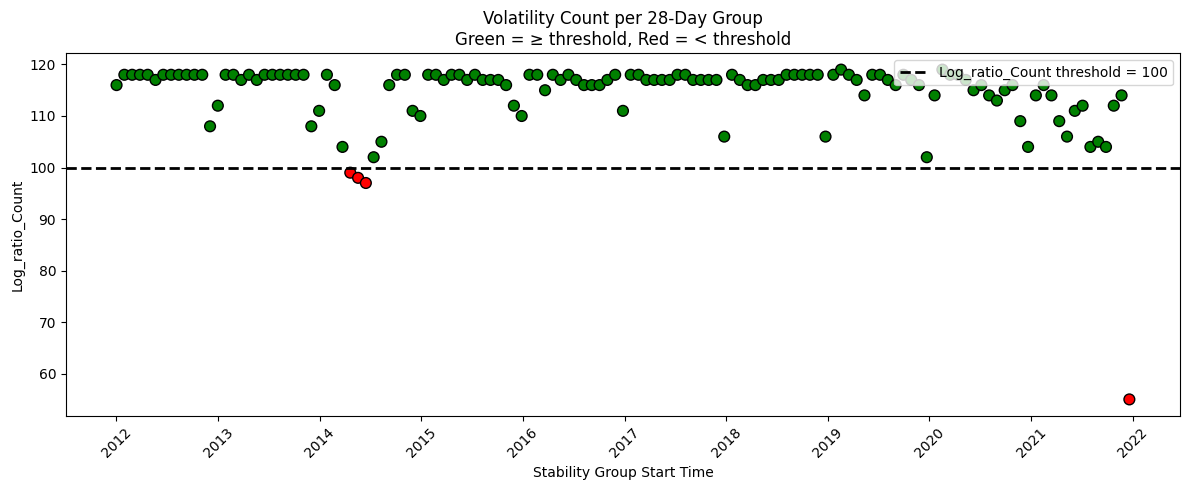

Stability_group_id
2012-01-02    116
2012-01-30    118
2012-02-27    118
2012-03-26    118
2012-04-23    118
             ... 
2021-08-30    105
2021-09-27    104
2021-10-25    112
2021-11-22    114
2021-12-20     55
Name: Log_ratio_Count, Length: 131, dtype: int64

In [448]:
def plot_vol_present_scatter(df_grouped, threshold):
    """
    Plot a scatter of Vol_present per stability group.
    Green = group has enough volatility points (≥ threshold)
    Red = group has too few (< threshold)
    """
    vol_present = df_grouped["Log_ratio_Count"]
    passed = vol_present >= threshold

    plt.figure(figsize=(12, 5))
    plt.scatter(
        vol_present.index, vol_present.values,
        c=['green' if ok else 'red' for ok in passed],
        edgecolor='k', s=60
    )
    plt.axhline(y=threshold, color='black', linestyle='--', linewidth=2,
                label=f"Log_ratio_Count threshold = {threshold}")
    plt.xticks(rotation=45)
    plt.xlabel('Stability Group Start Time')
    plt.ylabel('Log_ratio_Count')
    plt.title('Volatility Count per 28-Day Group\nGreen = ≥ threshold, Red = < threshold')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    return vol_present

plot_vol_present_scatter(grouped_28_day_df, threshold=100)

In [449]:
def plot_log_rvol_ratio_statistics_filtered(df_grouped, threshold):
    """
    Filter groups with sufficient log-rVol ratio counts and plot mean, std dev,
    skewness, and kurtosis of ln(rVol / rVol_p) for those groups only.
    """
    # Filter the DataFrame for groups meeting the threshold
    sufficient_data = df_grouped[df_grouped["Log_ratio_Count"] >= threshold]

    # Set up the subplots
    fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

    # Plotting each metric
    axs[0].scatter(sufficient_data.index, sufficient_data['Log_ratio_Mean'], color='blue', s=30)
    axs[0].set_ylabel('Mean')
    axs[0].set_title('Mean of ln(rVol / rVol_p)')
    axs[0].tick_params(labelbottom=True)

    axs[1].scatter(sufficient_data.index, sufficient_data['Log_ratio_Std'], color='orange', s=30)
    axs[1].set_ylabel('Std Dev')
    axs[1].set_title('Std Dev of ln(rVol / rVol_p)')
    axs[1].tick_params(labelbottom=True)

    axs[2].scatter(sufficient_data.index, sufficient_data['Log_ratio_Skew'], color='green', s=30)
    axs[2].set_ylabel('Skewness')
    axs[2].set_title('Skewness of ln(rVol / rVol_p)')
    axs[2].tick_params(labelbottom=True)

    axs[3].scatter(sufficient_data.index, sufficient_data['Log_ratio_Kurtosis'], color='red', s=30)
    axs[3].set_ylabel('Kurtosis')
    axs[3].set_xlabel('Stability Group Start Time')
    axs[3].set_title('Kurtosis of ln(rVol / rVol_p)')

    # Final layout
    plt.suptitle(f'Log-Volatility Ratio Statistics (Groups with ≥ {threshold} Log_ratio_Count)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
   

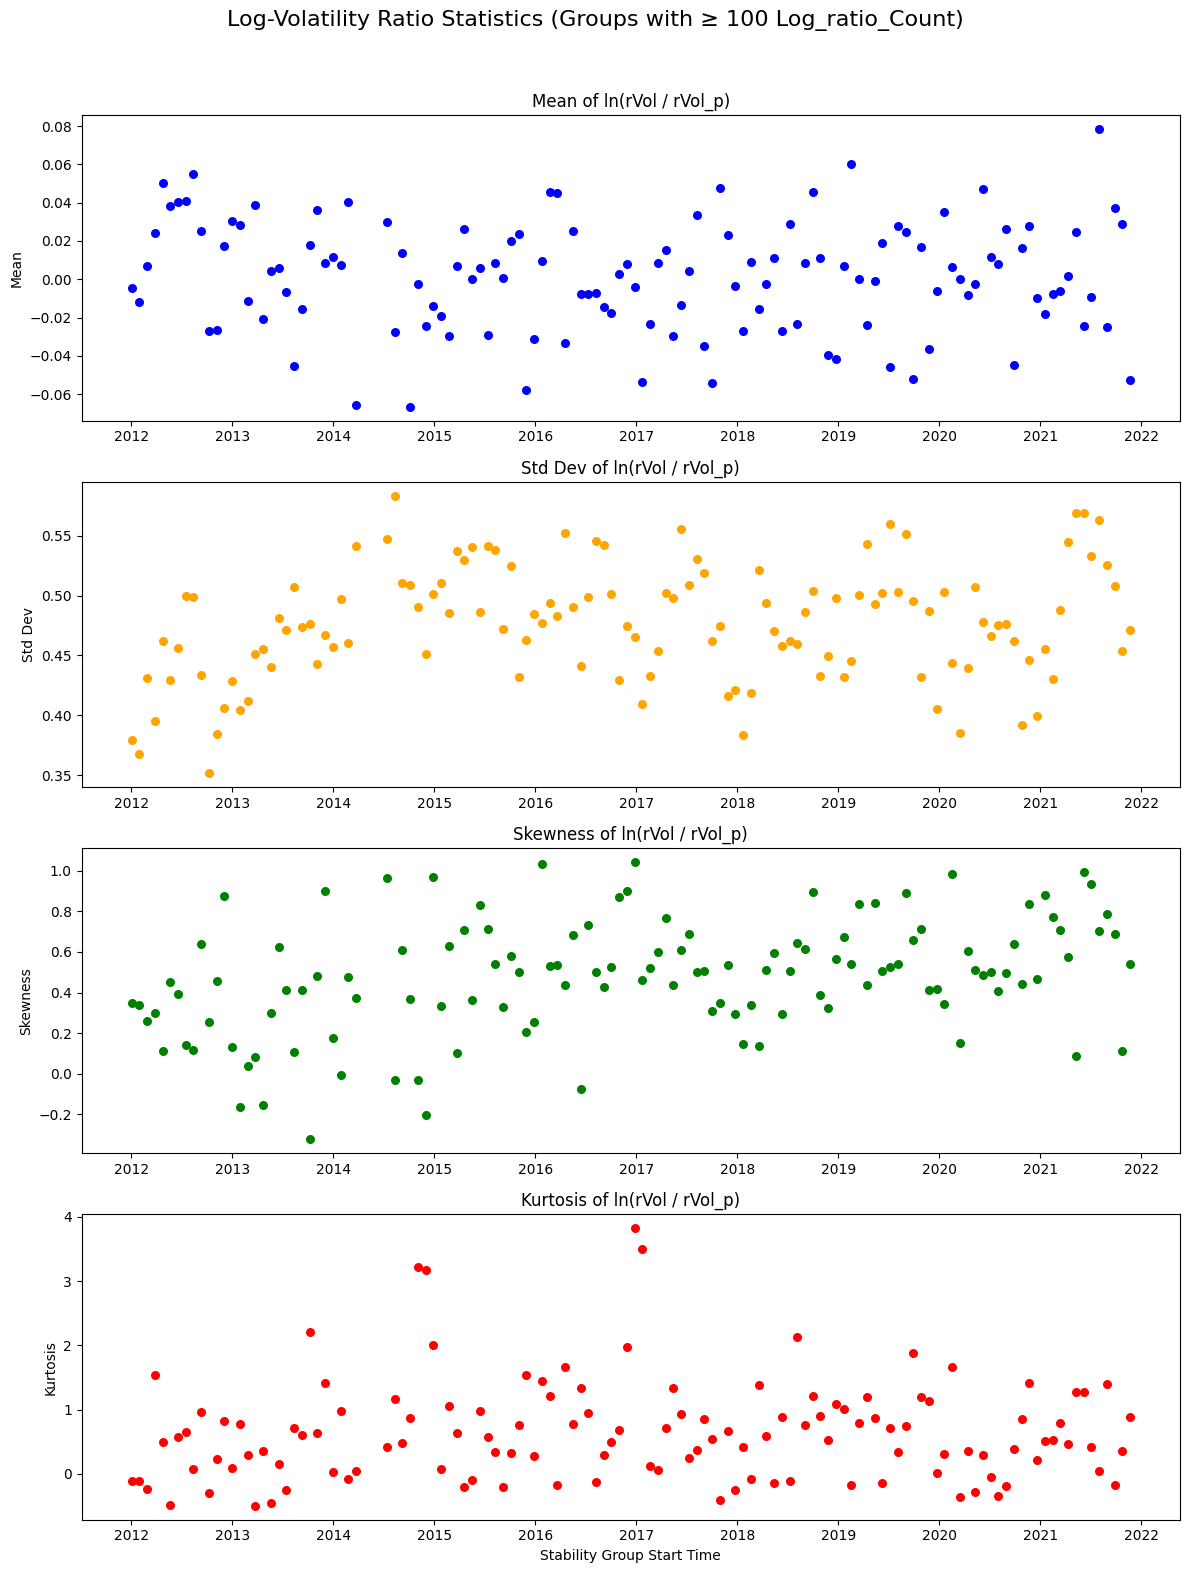

In [450]:
plot_log_rvol_ratio_statistics_filtered(grouped_28_day_df, threshold=100)

In [451]:
grouped_28_day_df

StartDateTime         EndDateTime  Open_first  \
Stability_group_id                                                       
2012-01-02         2012-01-02 06:00:00 2012-01-29 23:59:00     1.29454   
2012-01-30         2012-01-30 02:00:00 2012-02-26 23:59:00     1.31470   
2012-02-27         2012-02-27 02:00:00 2012-03-25 23:59:00     1.34419   
2012-03-26         2012-03-26 02:00:00 2012-04-22 23:59:00     1.32567   
2012-04-23         2012-04-23 02:00:00 2012-05-20 23:59:00     1.31893   
...                                ...                 ...         ...   
2021-08-30         2021-08-30 00:00:00 2021-09-26 23:59:00     1.18038   
2021-09-27         2021-09-27 02:00:00 2021-10-24 23:59:00     1.17204   
2021-10-25         2021-10-25 02:00:00 2021-11-21 23:59:00     1.16569   
2021-11-22         2021-11-22 02:00:00 2021-12-19 23:59:00     1.12664   
2021-12-20         2021-12-20 02:00:00 2021-12-31 15:59:00     1.12519   

                    High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
Stability_group_id                                                             
2012-01-02           1.32207  1.26363     1.31766         0.0             63   
2012-01-30           1.34856  1.29736     1.34490         0.0             44   
2012-02-27           1.34848  1.30127     1.32648         0.0             52   
2012-03-26           1.33796  1.30025     1.31914         0.0             62   
2012-04-23           1.32829  1.26545     1.27940         0.0             63   
...                      ...      ...         ...         ...            ...   
2021-08-30           1.19090  1.16834     1.17221         0.0            250   
2021-09-27           1.17228  1.15242     1.16638         0.0            193   
2021-10-25           1.16899  1.12499     1.12780         0.0            213   
2021-11-22           1.13827  1.11859     1.12492         0.0            202   
2021-12-20           1.13856  1.12471     1.13760         0.0            260   

                      count  Vol_mean   Vol_std  Vol_skew  Vol_kurtosis  \
Stability_group_id                                                        
2012-01-02          13857.0  9.685762  4.518176  0.719478     -0.167932   
2012-01-30          14116.0  9.568767  4.010291  0.967011      1.266636   
2012-02-27          14108.0  8.255587  3.775521  1.165130      1.772994   
2012-03-26          14098.0  7.968764  3.293604  0.884005      1.173972   
2012-04-23          14097.0  7.929951  3.574069  0.803032      0.580965   
...                     ...       ...       ...       ...           ...   
2021-08-30          12350.0  4.405455  3.278227  4.618214     30.993077   
2021-09-27          12287.0  4.642152  2.407876  1.545987      4.417007   
2021-10-25          13227.0  5.388936  3.343728  2.018100      5.939758   
2021-11-22          13478.0  5.816001  3.652039  2.336033     10.099833   
2021-12-20           6340.0  4.889726  2.936707  0.818501      0.036345   

                    Log_ratio_Count  Log_ratio_Mean  Log_ratio_Std  \
Stability_group_id                                                   
2012-01-02                      116       -0.004706       0.379195   
2012-01-30                      118       -0.011703       0.367407   
2012-02-27                      118        0.006848       0.430742   
2012-03-26                      118        0.024006       0.395598   
2012-04-23                      118        0.050341       0.461963   
...                             ...             ...            ...   
2021-08-30                      105       -0.025123       0.525707   
2021-09-27                      104        0.037030       0.507749   
2021-10-25                      112        0.028708       0.453642   
2021-11-22                      114       -0.052558       0.471107   
2021-12-20                       55       -0.085585       0.626950   

                    Log_ratio_Skew  Log_ratio_Kurtosis Stability_group_end  
Stability_group_id                                       

In [452]:
#need to check below parameters
# Vol spike detection
#vol decay models

# Wednesday meeting 31st July
# Minimize std dev
# Multi factor newton raphson

#pred vol^2 = alpha * previous vol^2 + (1-alpha)* weighted vol^2 
#lets say decay factor=0.9, we have to change this multiple time to reduce std dev
# weighted vol^2 = 0.9^0 * previous vol^2 + 0.9^1 * previous prev vol^2 + 0.9^2.../( 0.9^0 +  0.9^1 + 0.9^2..)
# Try to find multiple variations to 0.9 so that std dev is minimised.

#Also, you can stop for weighted vol = blah * prev vol + blah * prev prev vol. You can stop at 2 prev vol, because as power increases, it doesnt matter.

#spike and decay detect

In [453]:
RS_120m_rvol

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2012-01-02 03:59:00 2012-01-02 02:00:00 2012-01-02 02:00:00     1.29324   
2012-01-02 05:59:00 2012-01-02 04:00:00 2012-01-02 04:00:00     1.29384   
2012-01-02 07:59:00 2012-01-02 06:00:00 2012-01-02 06:00:00     1.29454   
2012-01-02 09:59:00 2012-01-02 08:00:00 2012-01-02 08:00:00     1.29382   
2012-01-02 11:59:00 2012-01-02 10:00:00 2012-01-02 10:00:00     1.29325   
...                                 ...                 ...         ...   
2021-12-31 07:59:00 2021-12-31 06:00:00 2021-12-31 06:00:00     1.13248   
2021-12-31 09:59:00 2021-12-31 08:00:00 2021-12-31 08:00:00     1.13253   
2021-12-31 11:59:00 2021-12-31 10:00:00 2021-12-31 10:00:00     1.13438   
2021-12-31 13:59:00 2021-12-31 12:00:00 2021-12-31 12:00:00     1.13790   
2021-12-31 15:59:00 2021-12-31 14:00:00 2021-12-31 14:00:00     1.13848   

                     High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
EndDateTime                                                                     
2012-01-02 03:59:00   1.29531  1.29275     1.29383         0.0              1   
2012-01-02 05:59:00   1.29709  1.29381     1.29457         0.0              1   
2012-01-02 07:59:00   1.29514  1.29311     1.29381         0.0              2   
2012-01-02 09:59:00   1.29442  1.29227     1.29327         0.0              4   
2012-01-02 11:59:00   1.29413  1.29167     1.29197         0.0              6   
...                       ...      ...         ...         ...            ...   
2021-12-31 07:59:00   1.13349  1.13120     1.13252         0.0              0   
2021-12-31 09:59:00   1.13534  1.13191     1.13437         0.0              0   
2021-12-31 11:59:00   1.13796  1.13379     1.13790         0.0              0   
2021-12-31 13:59:00   1.13863  1.13747     1.13846         0.0              2   
2021-12-31 15:59:00   1.13856  1.13760     1.13760         0.0             10   

                     count  RVol_120min_Rogers-Satchell  Prev_Close_global  \
EndDateTime                                                                  
2012-01-02 03:59:00  119.0                     9.658213            1.29324   
2012-01-02 05:59:00  119.0                    12.216589            1.29383   
2012-01-02 07:59:00  118.0                     6.511085            1.29457   
2012-01-02 09:59:00  116.0                     7.580019            1.29381   
2012-01-02 11:59:00  114.0                     6.842128            1.29327   
...                    ...                          ...                ...   
2021-12-31 07:59:00  120.0                     6.169781            1.13248   
2021-12-31 09:59:00  120.0                    10.520242            1.13252   
2021-12-31 11:59:00  120.0                    12.417189            1.13437   
2021-12-31 13:59:00  118.0                     3.653830            1.13790   
2021-12-31 15:59:00  110.0                     2.367408            1.13846   

                     Log_Returns_global  
EndDateTime                              
2012-01-02 03:59:00            0.000456  
2012-01-02 05:59:00            0.000572  
2012-01-02 07:59:00           -0.000587  
2012-01-02 09:59:00           -0.000417  
2012-01-02 11:59:00           -0.001006  
...                                 ...  
2021-12-31 07:59:00            0.000035  
2021-12-31 09:59:00            0.001632  
2021-12-31 11:59:00            0.003107  
2021-12-31 13:59:00            0.000492  
2021-12-31 15:59:00           -0.000756  

[29979 rows x 12 columns]

C:\Users\phani\AppData\Local\Temp\ipykernel_17456\2865826790.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open'], inplace=True)
C:\Users\phani\AppData\Local\Temp\ipykernel_17456\4174277596.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")


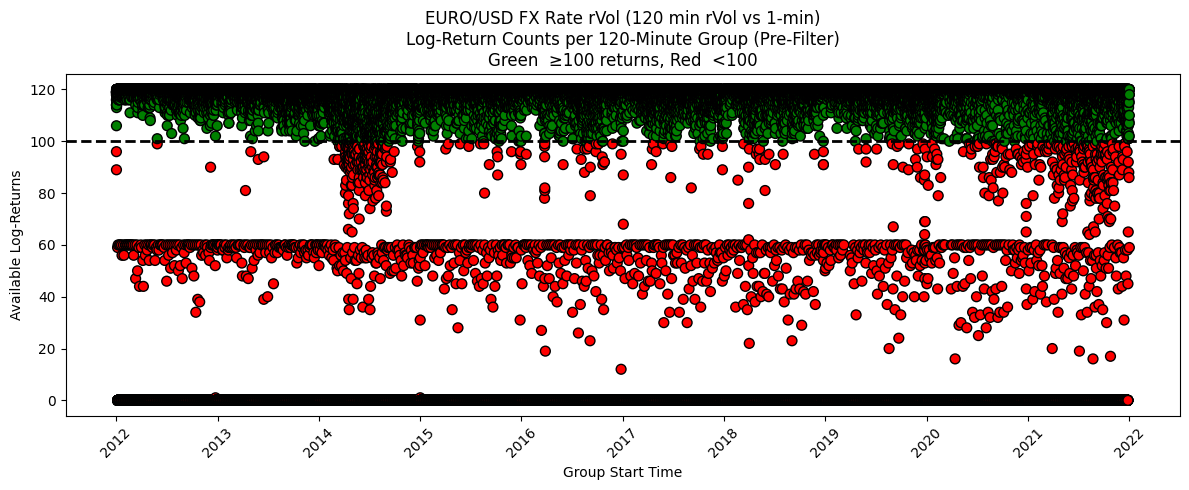

Keeping 29979 groups (the green ones) out of 43820 total.


C:\Users\phani\AppData\Local\Temp\ipykernel_17456\2441554807.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                              sum  count
group_id                                
2012-01-02 02:00:00  2.390660e-06    119
2012-01-02 04:00:00  6.528883e-06    119
2012-01-02 06:00:00  1.139618e-06    118
2012-01-02 08:00:00  1.449495e-06    116
2012-01-02 10:00:00  9.088269e-07    114
...                           ...    ...
2021-12-31 06:00:00  1.954066e-06    120
2021-12-31 08:00:00  3.623978e-06    120
2021-12-31 10:00:00  7.476214e-06    120
2021-12-31 12:00:00  5.878490e-07    118
2021-12-31 14:00:00  3.586935e-07    110

[29979 rows x 2 columns]


C:\Users\phani\AppData\Local\Temp\ipykernel_17456\779989498.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open_first'], inplace=True)


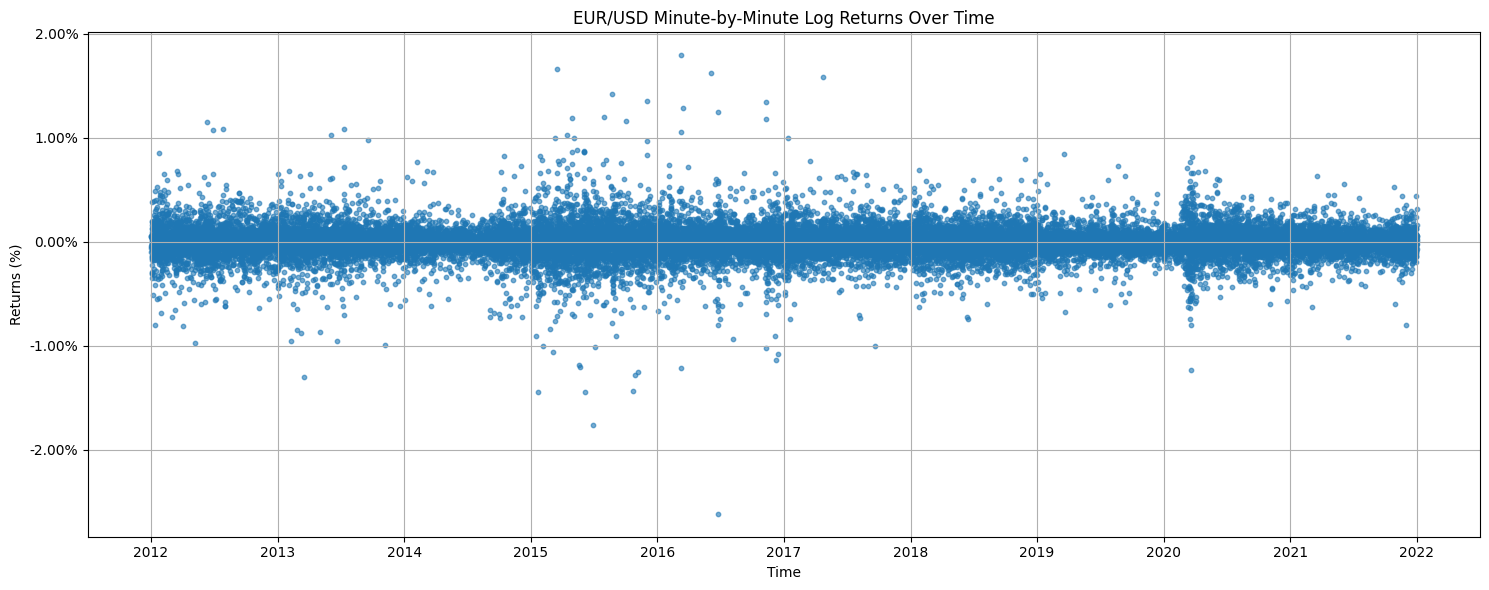

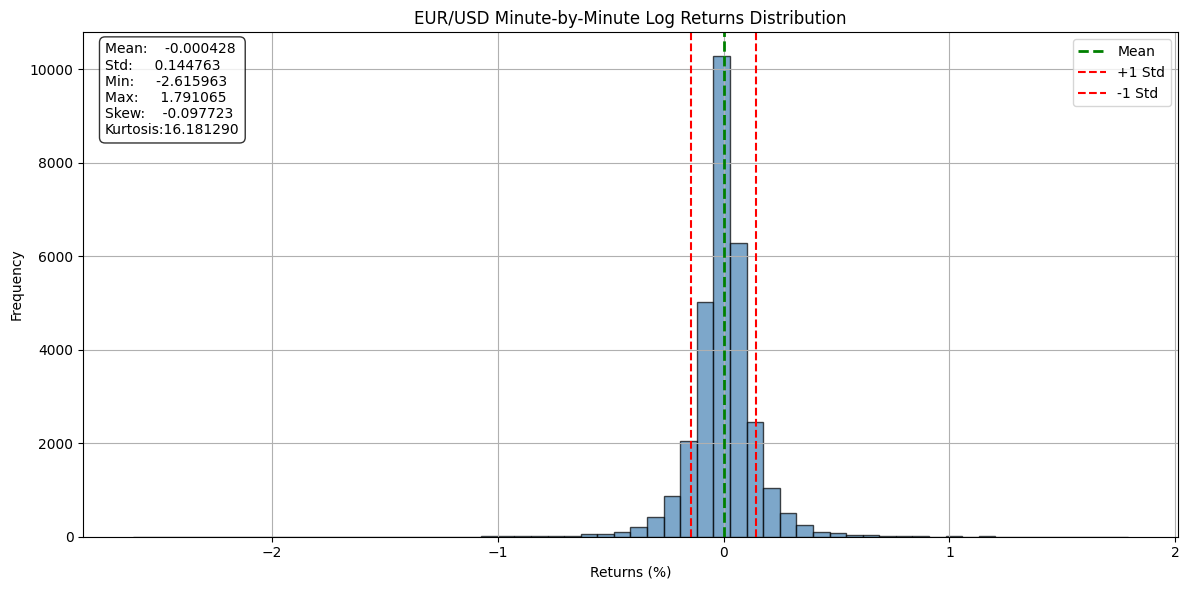

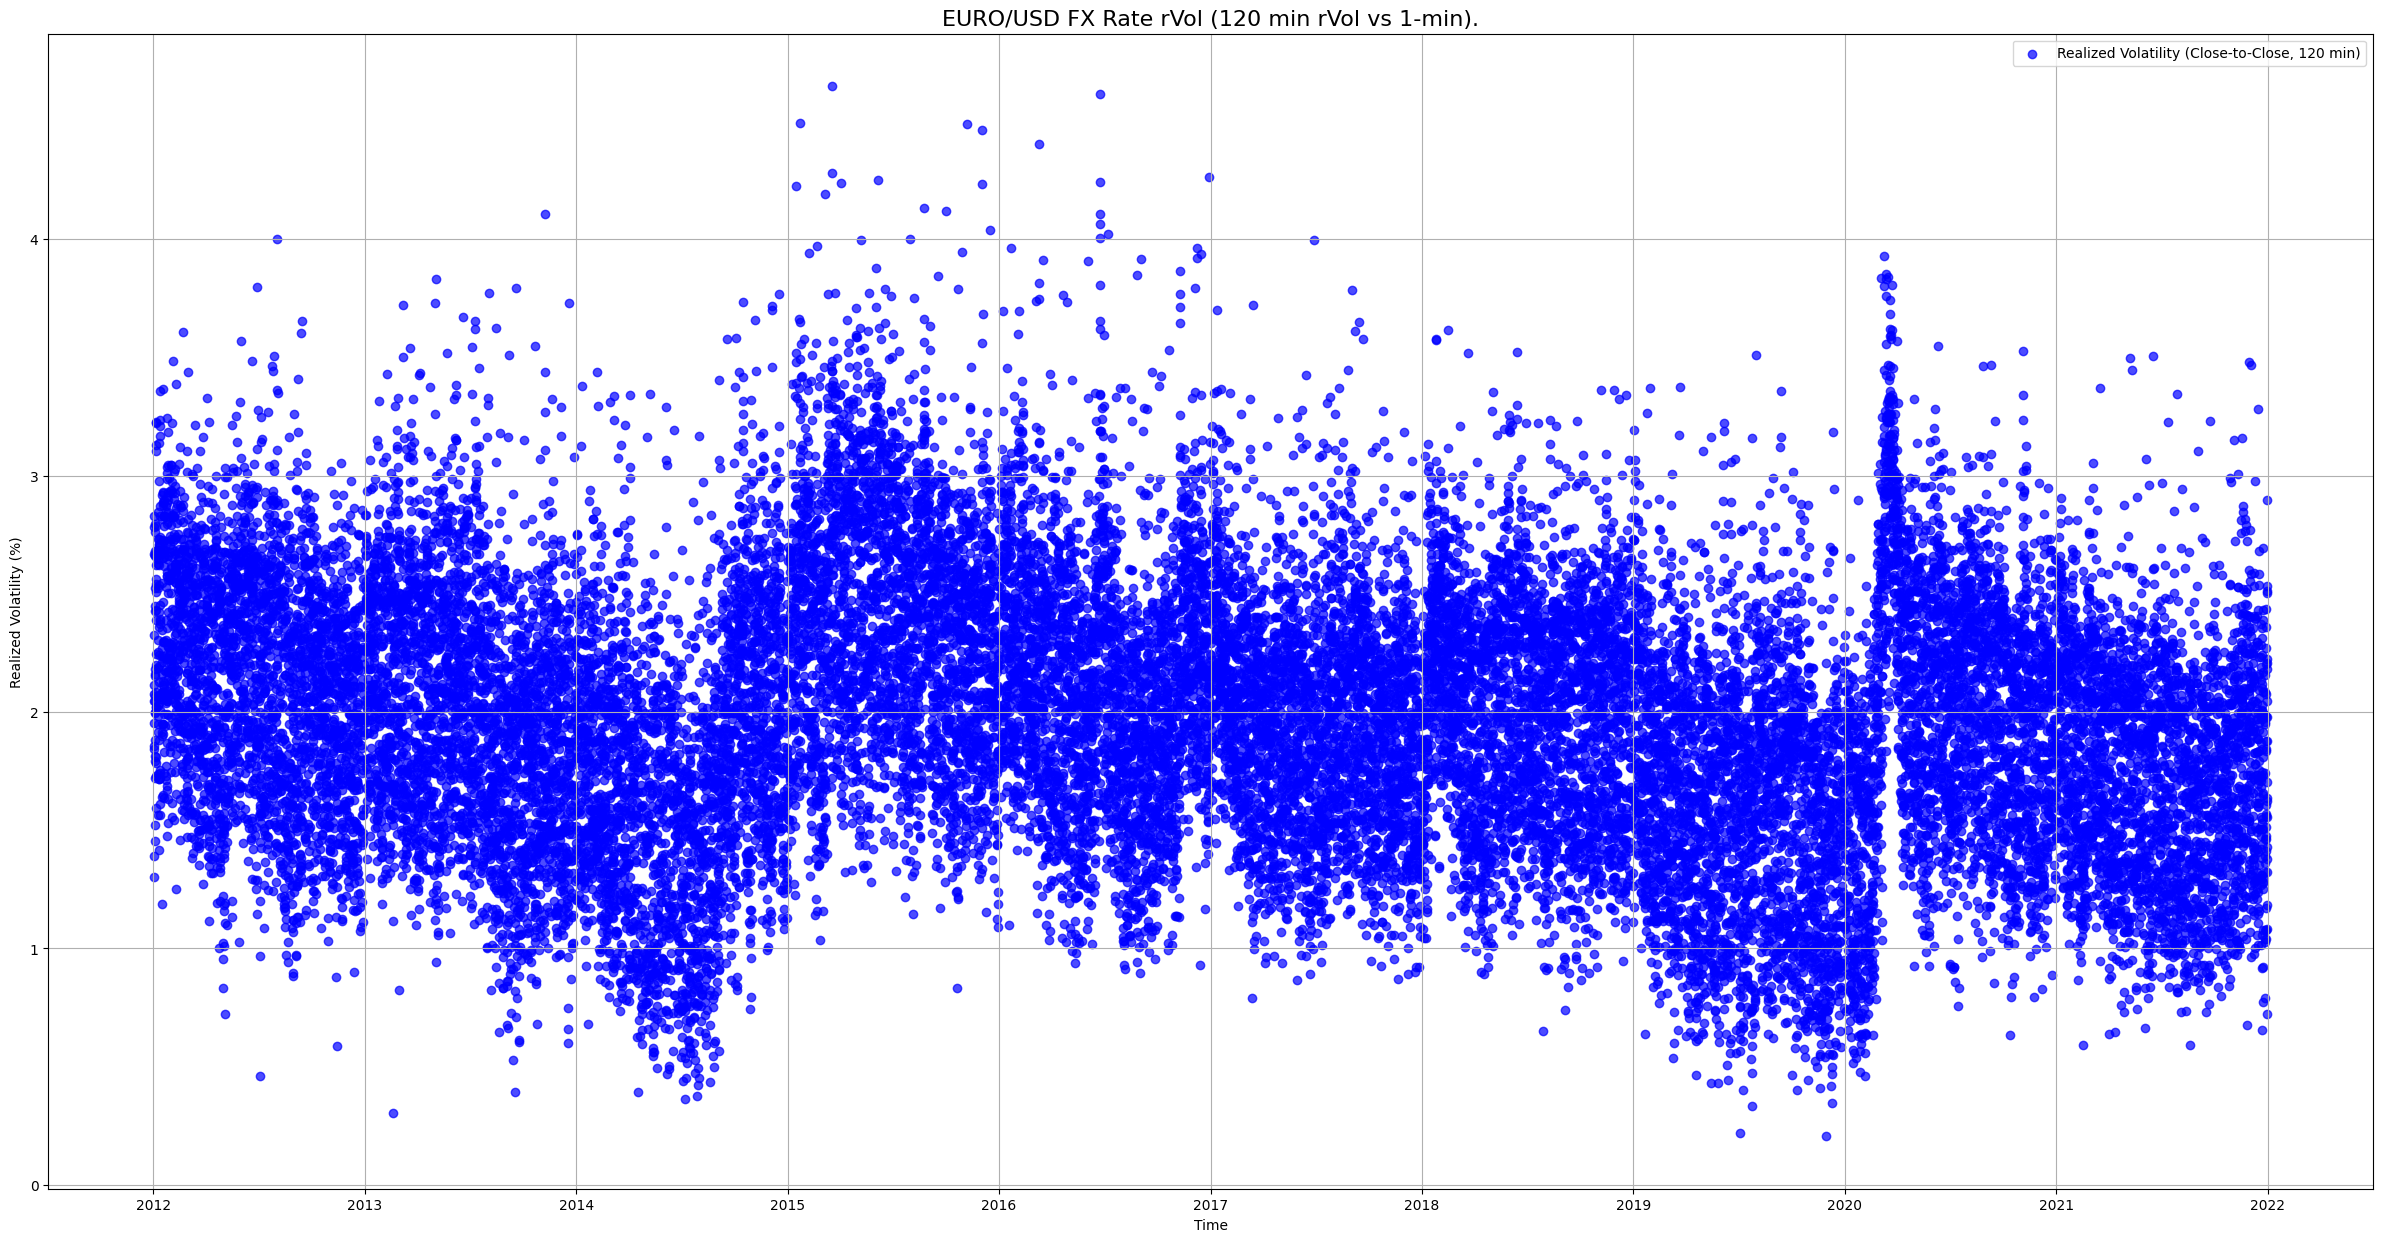

                 group_id       StartDateTime         EndDateTime  Open_first  \
0     2012-01-02 02:00:00 2012-01-02 02:00:00 2012-01-02 03:59:00     1.29324   
1     2012-01-02 04:00:00 2012-01-02 04:00:00 2012-01-02 05:59:00     1.29384   
2     2012-01-02 06:00:00 2012-01-02 06:00:00 2012-01-02 07:59:00     1.29454   
3     2012-01-02 08:00:00 2012-01-02 08:00:00 2012-01-02 09:59:00     1.29382   
4     2012-01-02 10:00:00 2012-01-02 10:00:00 2012-01-02 11:59:00     1.29325   
...                   ...                 ...                 ...         ...   
29974 2021-12-31 06:00:00 2021-12-31 06:00:00 2021-12-31 07:59:00     1.13248   
29975 2021-12-31 08:00:00 2021-12-31 08:00:00 2021-12-31 09:59:00     1.13253   
29976 2021-12-31 10:00:00 2021-12-31 10:00:00 2021-12-31 11:59:00     1.13438   
29977 2021-12-31 12:00:00 2021-12-31 12:00:00 2021-12-31 13:59:00     1.13790   
29978 2021-12-31 14:00:00 2021-12-31 14:00:00 2021-12-31 15:59:00     1.13848   

       High_max  Low_min  C

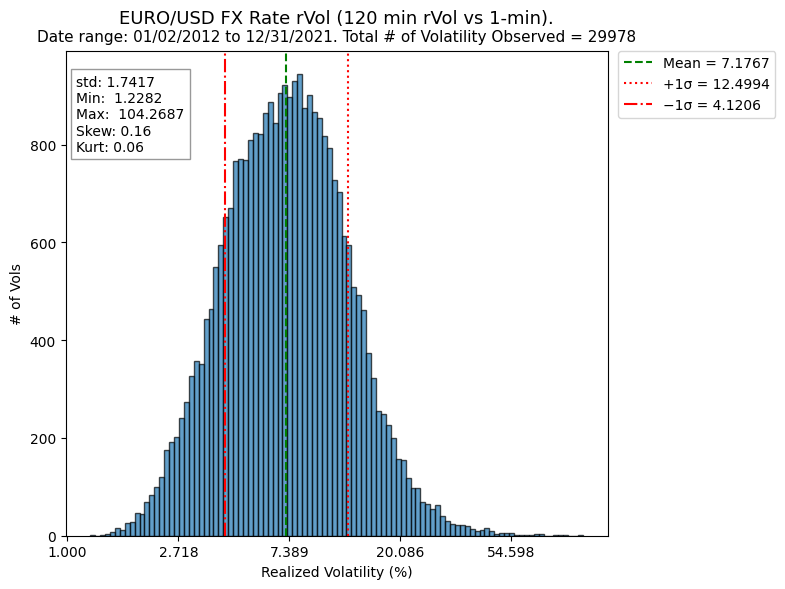

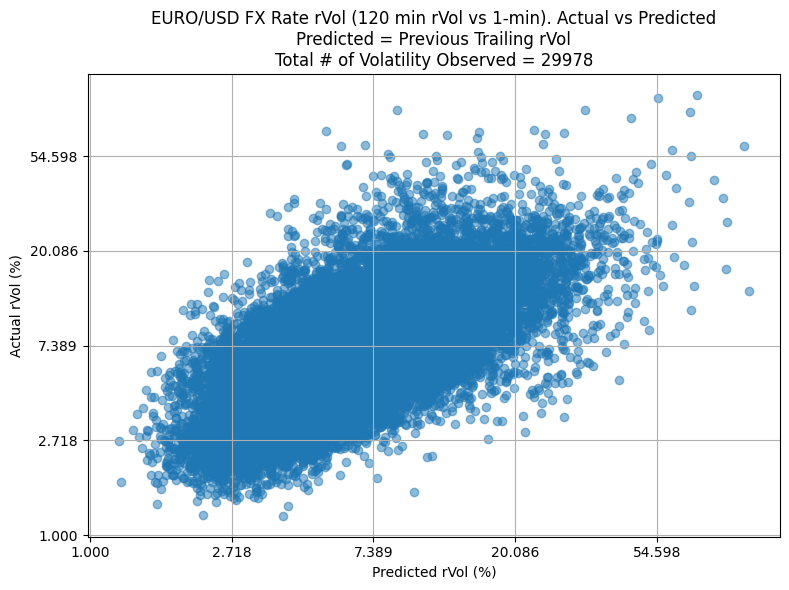

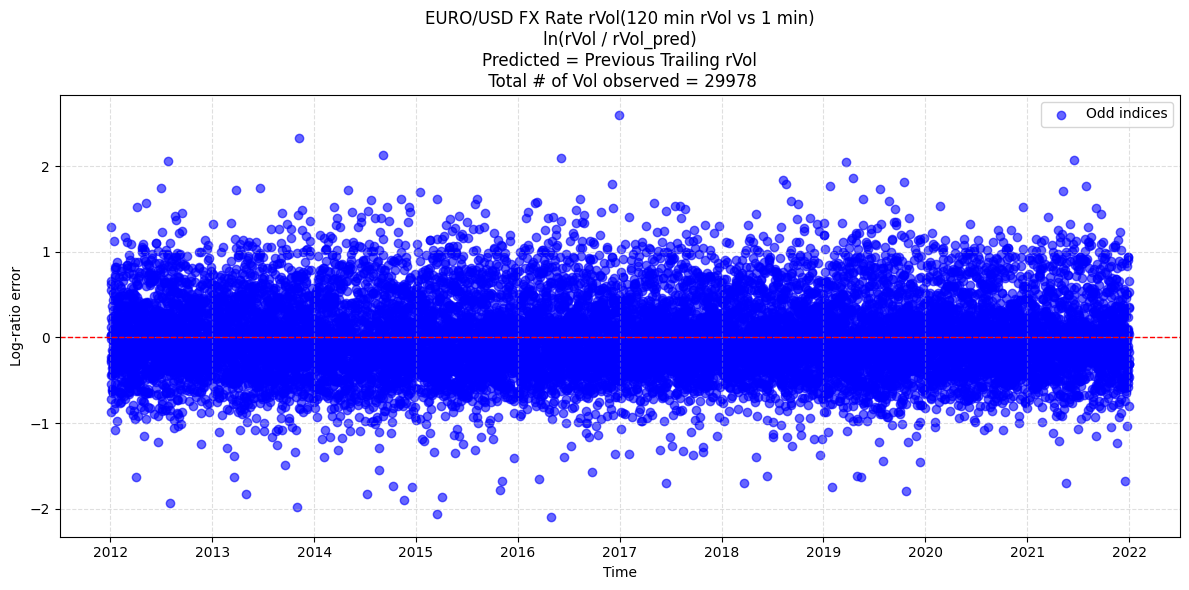

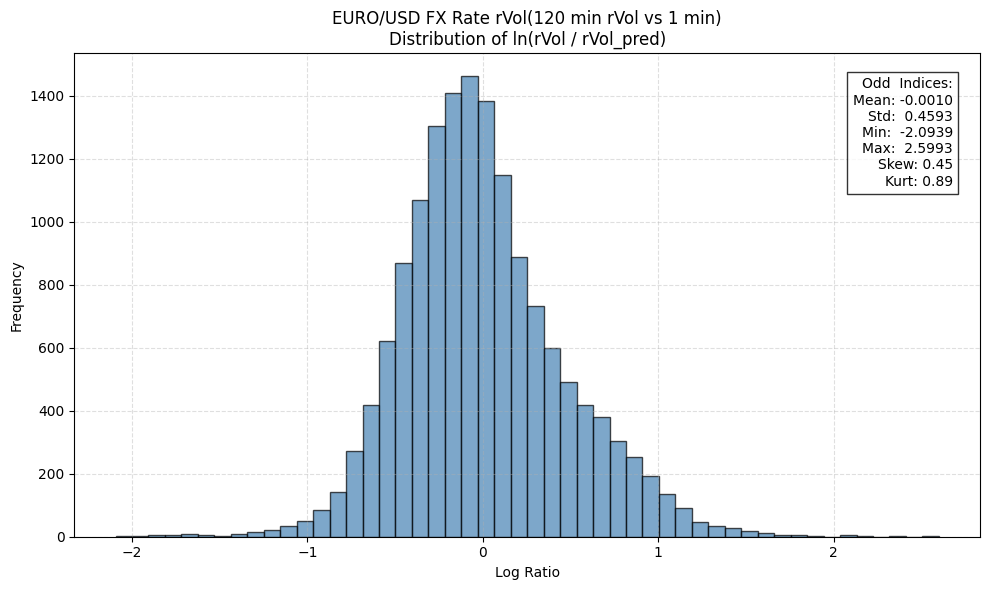

In [454]:
CC_120m_rvol = calculate_rvol(data, 
                              vol_measure = 'Close-to-Close', 
                              timeframe = 120, 
                              minute_interval = 1, 
                              threshold = 0.1667, 
                              vol_title = 'RVol_120min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [456]:
CC_120m_rvol

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2012-01-02 03:59:00 2012-01-02 02:00:00 2012-01-02 02:00:00     1.29324   
2012-01-02 05:59:00 2012-01-02 04:00:00 2012-01-02 04:00:00     1.29384   
2012-01-02 07:59:00 2012-01-02 06:00:00 2012-01-02 06:00:00     1.29454   
2012-01-02 09:59:00 2012-01-02 08:00:00 2012-01-02 08:00:00     1.29382   
2012-01-02 11:59:00 2012-01-02 10:00:00 2012-01-02 10:00:00     1.29325   
...                                 ...                 ...         ...   
2021-12-31 07:59:00 2021-12-31 06:00:00 2021-12-31 06:00:00     1.13248   
2021-12-31 09:59:00 2021-12-31 08:00:00 2021-12-31 08:00:00     1.13253   
2021-12-31 11:59:00 2021-12-31 10:00:00 2021-12-31 10:00:00     1.13438   
2021-12-31 13:59:00 2021-12-31 12:00:00 2021-12-31 12:00:00     1.13790   
2021-12-31 15:59:00 2021-12-31 14:00:00 2021-12-31 14:00:00     1.13848   

                     High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
EndDateTime                                                                     
2012-01-02 03:59:00   1.29531  1.29275     1.29383         0.0              1   
2012-01-02 05:59:00   1.29709  1.29381     1.29457         0.0              1   
2012-01-02 07:59:00   1.29514  1.29311     1.29381         0.0              2   
2012-01-02 09:59:00   1.29442  1.29227     1.29327         0.0              4   
2012-01-02 11:59:00   1.29413  1.29167     1.29197         0.0              6   
...                       ...      ...         ...         ...            ...   
2021-12-31 07:59:00   1.13349  1.13120     1.13252         0.0              0   
2021-12-31 09:59:00   1.13534  1.13191     1.13437         0.0              0   
2021-12-31 11:59:00   1.13796  1.13379     1.13790         0.0              0   
2021-12-31 13:59:00   1.13863  1.13747     1.13846         0.0              2   
2021-12-31 15:59:00   1.13856  1.13760     1.13760         0.0             10   

                     count  RVol_120min_Close-to-Close  Prev_Close_global  \
EndDateTime                                                                 
2012-01-02 03:59:00  119.0                   10.232835            1.29324   
2012-01-02 05:59:00  119.0                   16.910501            1.29383   
2012-01-02 07:59:00  118.0                    7.065073            1.29457   
2012-01-02 09:59:00  116.0                    7.967928            1.29381   
2012-01-02 11:59:00  114.0                    6.309249            1.29327   
...                    ...                         ...                ...   
2021-12-31 07:59:00  120.0                    9.251383            1.13248   
2021-12-31 09:59:00  120.0                   12.598818            1.13252   
2021-12-31 11:59:00  120.0                   18.095806            1.13437   
2021-12-31 13:59:00  118.0                    5.074228            1.13790   
2021-12-31 15:59:00  110.0                    3.963682            1.13846   

                     Log_Returns_global  
EndDateTime                              
2012-01-02 03:59:00            0.000456  
2012-01-02 05:59:00            0.000572  
2012-01-02 07:59:00           -0.000587  
2012-01-02 09:59:00           -0.000417  
2012-01-02 11:59:00           -0.001006  
...                                 ...  
2021-12-31 07:59:00            0.000035  
2021-12-31 09:59:00            0.001632  
2021-12-31 11:59:00            0.003107  
2021-12-31 13:59:00            0.000492  
2021-12-31 15:59:00           -0.000756  

[29979 rows x 12 columns]

In [457]:
#Doing stability test from here on
# 
def add_predicted_vol(df, vol_col='RVol_120min_Close-to-Close', alpha=0.3, decay=0.9, max_days=2): #{'alpha': 0.3, 'decay': 0.9, 'max_days': 20}
    
    '''Example
If the current time slot is 10:00 AM on July 21: decay = 0.9, max_days = 20
1. Check July 20 10:00 AM, weight = 0.9^0 = 1/sum * vol^2
2. Check July 19 10:00 AM, weight = 0.9^1 = 0.9/sum * vol^2
3. Check July 18 10:00 AM, weight = 0.9^2 = 0.8/sum * vol^2
4. ... up to 20 days back.
Take the weighted average of these volatilities.
'''
    df = df.copy()
    df.sort_index(inplace=True)

    # Extract time-of-day (slot ID) from StartDateTime
    df['Slot'] = df['StartDateTime'].dt.time
    df['Date'] = df['StartDateTime'].dt.date

    # Shift volatility by 1 to get previous period volatility
    df['Prev_Vol'] = df[vol_col].shift(1)

    # Container for decayed slot volatility
    decayed_slot_vols = []

    # Build a dictionary to quickly access vol by (date, slot)
    slot_vol_map = df.set_index(['Date', 'Slot'])[vol_col].to_dict()

    for idx, row in df.iterrows():
        current_date = row['Date']
        current_slot = row['Slot']
        
        slot_vol_sum = 0
        weight_sum = 0

        for n in range(1, max_days + 1):
            past_date = current_date - pd.Timedelta(days=n)
            key = (past_date, current_slot)

            if key in slot_vol_map:
                weight = decay ** (n - 1)
                slot_vol_sum += slot_vol_map[key] * weight
                weight_sum += weight

        decayed_vol = slot_vol_sum / weight_sum if weight_sum > 0 else np.nan
        decayed_slot_vols.append(decayed_vol)

    df['Decayed_Slot_Vol'] = decayed_slot_vols

    # Blend the two components
    df['Predicted_Var'] = alpha * (df['Prev_Vol']**2) + (1 - alpha) * (df['Decayed_Slot_Vol']**2)
    df['Predicted_Vol'] = df['Predicted_Var']**0.5

    return df


In [458]:
from scipy.optimize import minimize

def std_log_ratio_objective_fixed_max_days(params, df, vol_col, max_days):
    alpha, decay = params

    # Penalize invalid parameters
    if not (0 < alpha < 1 and 0 < decay < 1):
        return np.inf

    try:
        df_temp = df.copy()
        df_temp = add_predicted_vol(df_temp, vol_col, alpha, decay, max_days)

        actual = df_temp[vol_col].replace([np.inf, -np.inf], np.nan).dropna()
        pred = df_temp['Predicted_Vol'].replace([np.inf, -np.inf], np.nan).dropna()

        common_idx = actual.index.intersection(pred.index)
        actual = actual.loc[common_idx]
        pred = pred.loc[common_idx]

        if len(actual) < 2:
            return np.inf

        log_ratio = np.log(actual / pred)
        return log_ratio.std()

    except Exception:
        return np.inf

def optimize_alpha_decay(df, vol_col='RVol_120min_Close-to-Close', max_days=20, initial_guess=(0.3, 0.85)):
    bounds = [(0.01, 0.99), (0.01, 0.999)]  # bounds for alpha and decay

    result = minimize(
        std_log_ratio_objective_fixed_max_days,
        x0=initial_guess,
        args=(df, vol_col, max_days),
        bounds=bounds,
        method='L-BFGS-B'
    )

    if result.success:
        alpha_opt, decay_opt = result.x
        print("✅ Optimization Successful")
        print(f"Best alpha:     {alpha_opt:.4f}")
        print(f"Best decay:     {decay_opt:.4f}")
        print(f"Fixed max_days: {max_days}")
        print(f"Min Std of ln(rVol / rVol_pred): {result.fun:.6f}")
        return {
            'alpha': alpha_opt,
            'decay': decay_opt,
            'max_days': max_days,
            'std': result.fun
        }
    else:
        print("❌ Optimization failed:", result.message)
        return None

best_params = optimize_alpha_decay(CC_120m_rvol, max_days=20)


✅ Optimization Successful
Best alpha:     0.2167
Best decay:     0.8908
Fixed max_days: 20
Min Std of ln(rVol / rVol_pred): 0.307913


In [459]:
def optimize_params_on_group(df_group, vol_col='RVol_120min_Close-to-Close', max_days=2):
    from scipy.optimize import minimize

    def obj(params):
        alpha, decay = params
        return std_log_ratio_objective_fixed_max_days(params, df_group, vol_col, max_days)

    result = minimize(
        obj,
        x0=(0.3, 0.85),
        bounds=[(0.01, 0.99), (0.01, 0.999)],
        method='L-BFGS-B'
    )

    if result.success:
        return result.x[0], result.x[1], result.fun
    else:
        return np.nan, np.nan, np.nan

def rolling_stability_backtest(full_df, vol_col='RVol_120min_Close-to-Close', stability_days=28, max_days=2):
    full_df = full_df.copy()
    full_df.sort_index(inplace=True)

    # Assign stability group ID
    start_time = full_df.index.min().floor('D')
    full_df['Stability_group_id'] = ((full_df.index - start_time) // pd.Timedelta(days=stability_days)) * pd.Timedelta(days=stability_days) + start_time

    # Get sorted group IDs
    group_ids = sorted(full_df['Stability_group_id'].unique())
    results = []

    for i in range(len(group_ids) - 1):
        train_id = group_ids[i]
        test_id = group_ids[i + 1]

        train_data = full_df[full_df['Stability_group_id'] == train_id]
        test_data  = full_df[full_df['Stability_group_id'] == test_id]

        # Optimize on training data
        alpha, decay, train_std = optimize_params_on_group(train_data, vol_col=vol_col, max_days=max_days)

        if np.isnan(alpha):
            continue  # Skip if failed optimization

        # Apply to test data
        try:
            test_copy = test_data.copy()
            test_copy = add_predicted_vol(test_copy, vol_col, alpha, decay, max_days)
            test_copy['log_ratio'] = np.log(test_copy[vol_col] / test_copy['Predicted_Vol'])
            test_log_std = test_copy['log_ratio'].std()
        except:
            test_log_std = np.nan

        results.append({
            'Train_Group_ID': train_id,
            'Test_Group_ID': test_id,
            'alpha': alpha,
            'decay': decay,
            'max_days': max_days,
            'Train_LogRatio_Std': train_std,
            'Test_LogRatio_Std': test_log_std,
        })

    return pd.DataFrame(results)


In [460]:
backtest_df = rolling_stability_backtest(CC_120m_rvol)
backtest_df

Train_Group_ID Test_Group_ID     alpha     decay  max_days  \
0       2012-01-02    2012-01-30  0.280797  0.999000         2   
1       2012-01-30    2012-02-27  0.326020  0.720232         2   
2       2012-02-27    2012-03-26  0.125066  0.999000         2   
3       2012-03-26    2012-04-23  0.273659  0.322036         2   
4       2012-04-23    2012-05-21  0.287768  0.596672         2   
..             ...           ...       ...       ...       ...   
125     2021-08-02    2021-08-30  0.108737  0.754764         2   
126     2021-08-30    2021-09-27  0.242727  0.999000         2   
127     2021-09-27    2021-10-25  0.158449  0.999000         2   
128     2021-10-25    2021-11-22  0.297103  0.777106         2   
129     2021-11-22    2021-12-20  0.241161  0.999000         2   

     Train_LogRatio_Std  Test_LogRatio_Std  
0              0.281673           0.319882  
1              0.319086           0.296908  
2              0.285073           0.350003  
3              0.337939           0.323997  
4              0.322643           0.281901  
..                  ...                ...  
125            0.280538           0.351232  
126            0.346212           0.218841  
127            0.216074           0.371298  
128            0.366614           0.342738  
129            0.340559           0.314535  

[130 rows x 7 columns]

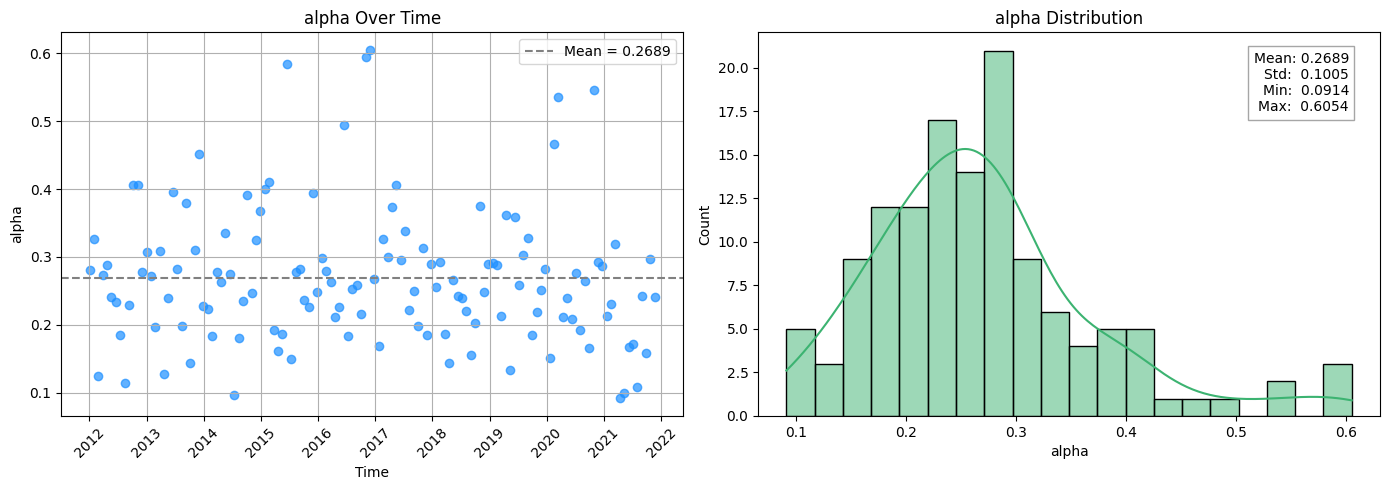

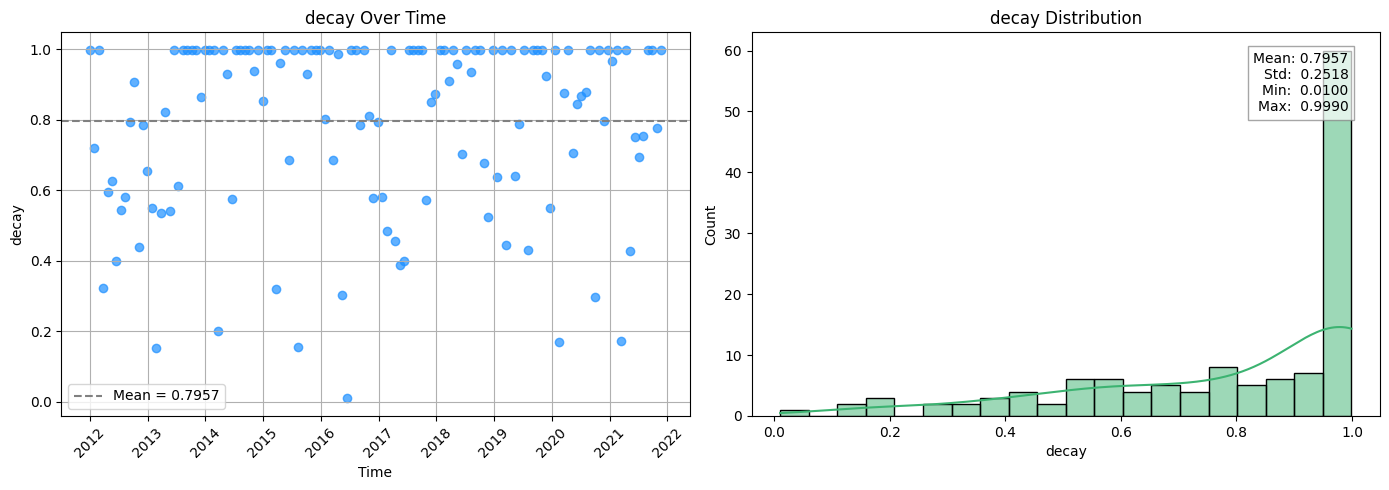

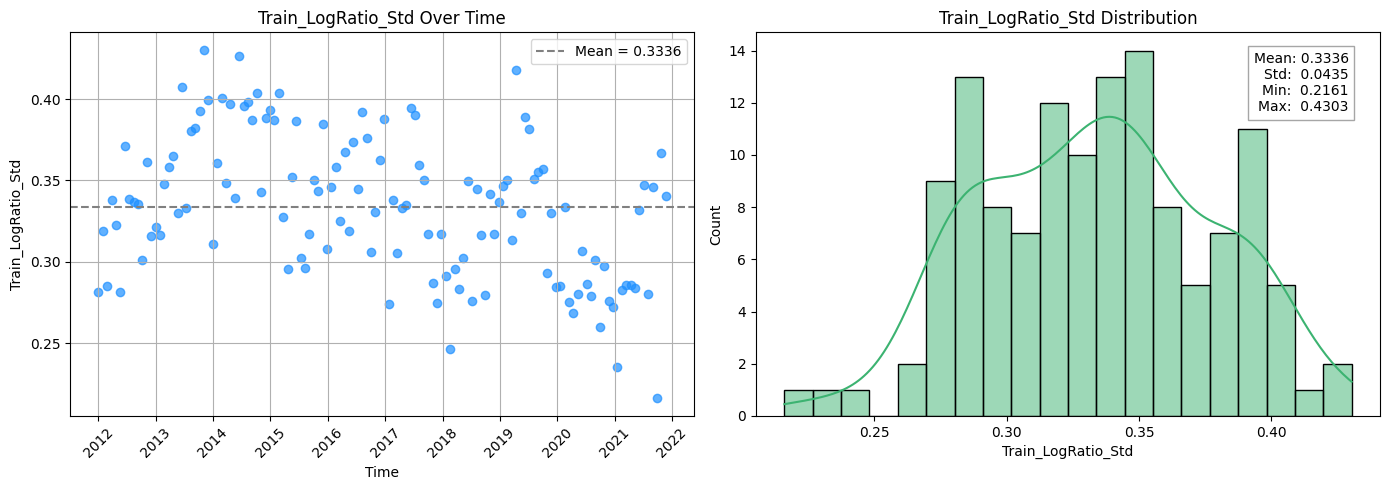

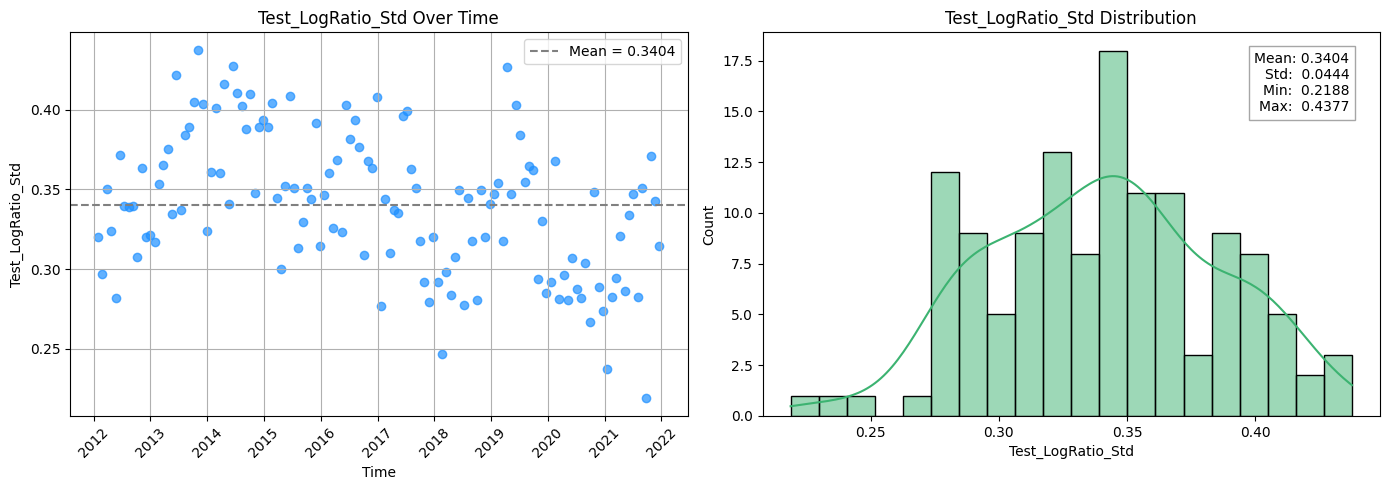

In [461]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_scatter_and_distribution(df, column, time_col='Train_Group_ID', title=None):
    series = df[column].dropna()

    # Compute stats
    mean_val = series.mean()
    std_val  = series.std()
    min_val  = series.min()
    max_val  = series.max()

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # 1. Scatter over time
    axes[0].scatter(df[time_col], df[column], alpha=0.7, color='dodgerblue')
    axes[0].axhline(mean_val, color='gray', linestyle='--', label=f"Mean = {mean_val:.4f}")
    axes[0].set_title(f"{column} Over Time")
    axes[0].set_xlabel("Time")
    axes[0].set_ylabel(column)
    axes[0].legend()
    axes[0].grid(True)
    axes[0].tick_params(axis='x', rotation=45)

    # 2. Distribution with stats
    sns.histplot(series, bins=20, kde=True, ax=axes[1], color='mediumseagreen', edgecolor='black')
    axes[1].set_title(f"{column} Distribution")

    stats_text = (
        f"Mean: {mean_val:.4f}\n"
        f"Std:  {std_val:.4f}\n"
        f"Min:  {min_val:.4f}\n"
        f"Max:  {max_val:.4f}"
    )
    axes[1].text(0.95, 0.95, stats_text, transform=axes[1].transAxes,
                 fontsize=10, va='top', ha='right',
                 bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7))

    plt.tight_layout()
    if title:
        plt.suptitle(title, fontsize=14, y=1.05)
    plt.show()

plot_scatter_and_distribution(backtest_df, 'alpha', time_col='Train_Group_ID')
plot_scatter_and_distribution(backtest_df, 'decay', time_col='Train_Group_ID')
plot_scatter_and_distribution(backtest_df, 'Train_LogRatio_Std', time_col='Train_Group_ID')
plot_scatter_and_distribution(backtest_df, 'Test_LogRatio_Std', time_col='Test_Group_ID')


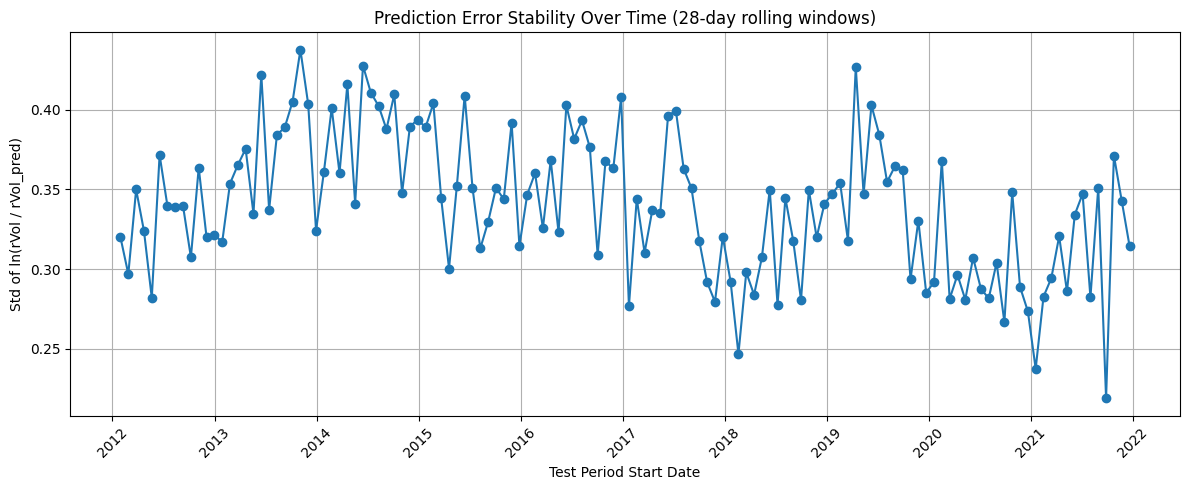

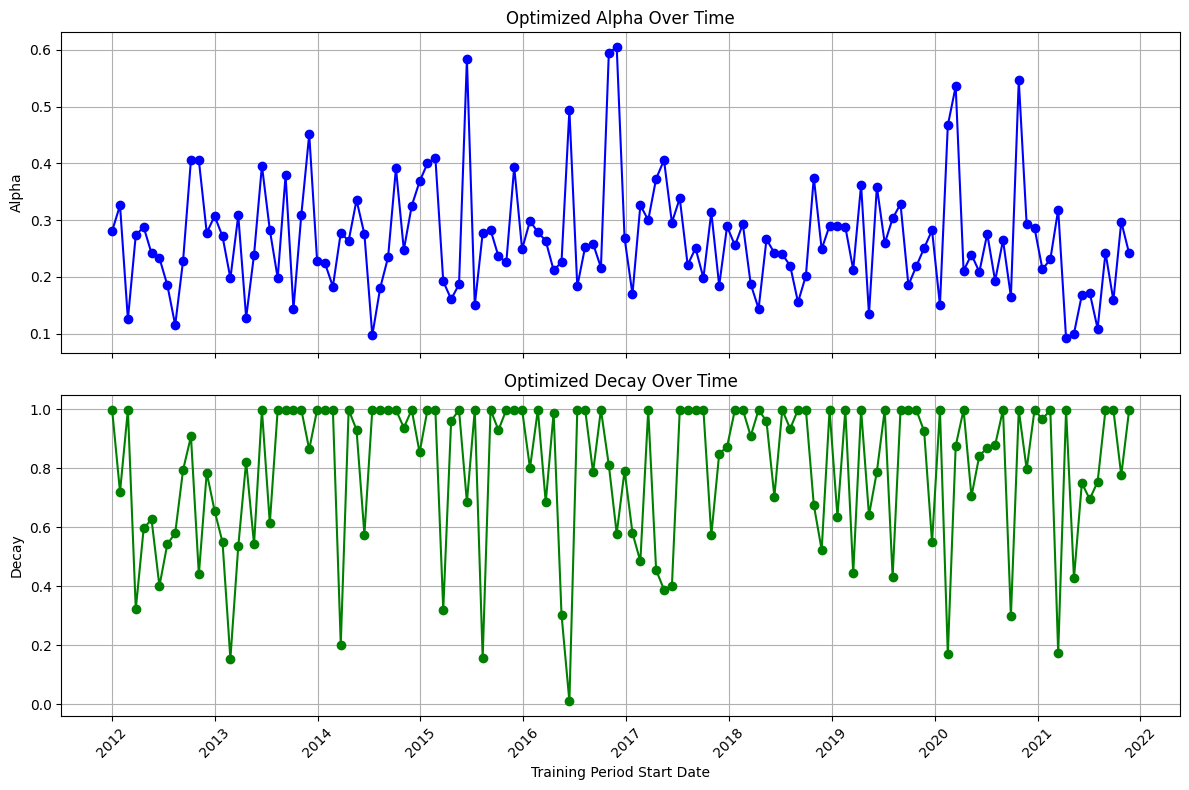

In [462]:
plt.figure(figsize=(12, 5))
plt.plot(backtest_df['Test_Group_ID'], backtest_df['Test_LogRatio_Std'], marker='o')
plt.title('Prediction Error Stability Over Time (28-day rolling windows)')
plt.xlabel('Test Period Start Date')
plt.ylabel('Std of ln(rVol / rVol_pred)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(backtest_df['Train_Group_ID'], backtest_df['alpha'], marker='o', color='blue')
ax[0].set_ylabel("Alpha")
ax[0].set_title("Optimized Alpha Over Time")
ax[0].grid(True)

ax[1].plot(backtest_df['Train_Group_ID'], backtest_df['decay'], marker='o', color='green')
ax[1].set_ylabel("Decay")
ax[1].set_title("Optimized Decay Over Time")
ax[1].set_xlabel("Training Period Start Date")
ax[1].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()